Connected to Python 3.10.8


------------------------------------------------------------
Sample frequency of IMU: [fs] = 100.0 Hz
Reference frame: 0
Simulation time duration: 732.5 s
Simulation runs: 10

------------------------------------------------------------
Simulation results are saved to /workspaces/gnss-ins-sim/work/demo_saved_data/tmp
The following results are saved:
	time: sample time
	ref_pos: true LLA pos in the navigation frame
	ref_vel: true vel in the NED frame
	ref_att_euler: true attitude (Euler angles, ZYX)
	ref_accel: true accel in the body frame
	ref_gyro: true angular velocity in the body frame
	accel: accel measurements
	gyro: gyro measurements
	ref_att_quat: true attitude (quaternion)


------------------------------------------------------------
Sample frequency of IMU: [fs] = 100.0 Hz
Reference frame: 0
Simulation time duration: 732.5 s
Simulation runs: 1

------------------------------------------------------------
Simulation results are saved to /workspaces/gnss-ins-sim/work/demo_save

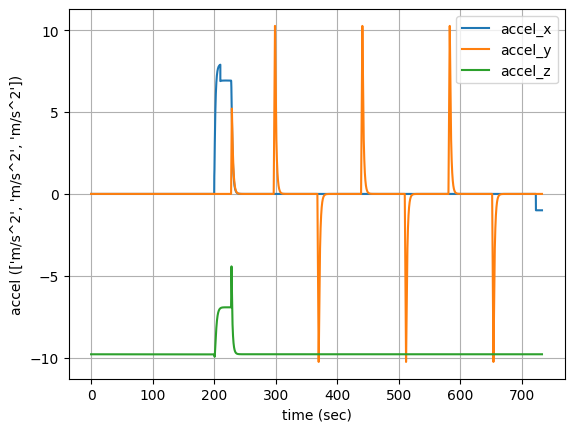

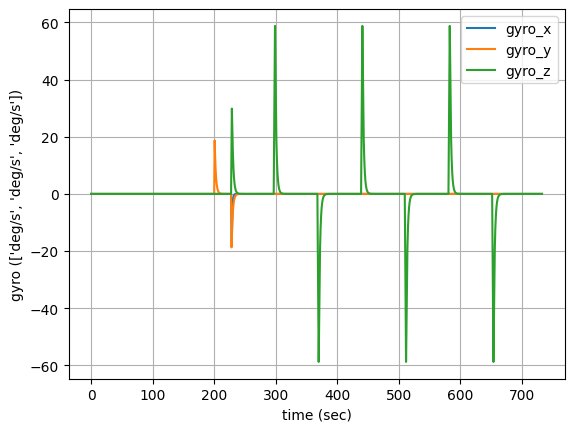

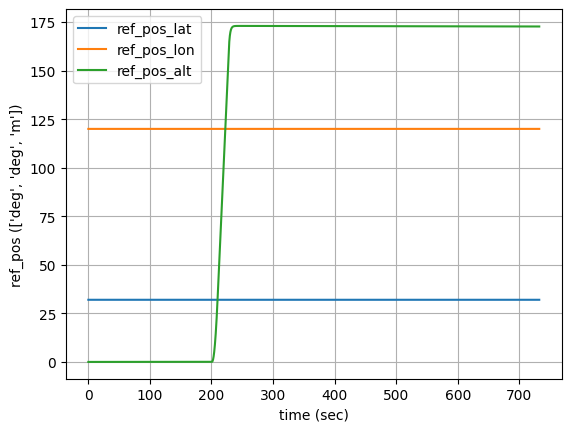

In [1]:
import os
import math
import numpy as np
from gnss_ins_sim.sim import imu_model
from gnss_ins_sim.sim import ins_sim

# globals
D2R = math.pi/180

motion_def_path = os.path.abspath('/workspaces/gnss-ins-sim/demo_motion_def_files//')
fs = 100.0          # IMU sample frequency
fs_gps = 10.0       # GPS sample frequency
fs_mag = fs         # magnetometer sample frequency, not used for now

def gen_data_first(data_dir):
    '''
    Generate data that will be used by test_gen_data_from_files()
    '''
    # imu model
    imu_err = {'gyro_b': np.array([0.0, 0.0, 0.0]) * 3600.0,
               'gyro_arw': np.array([0.0, 0.0, 0.0]) * 1.0,
               'gyro_b_stability': np.array([0.0, 0.0, 0.0]) * 1.0,
               'gyro_b_corr': np.array([100.0, 100.0, 100.0]),
               'accel_b': np.array([0.0, 0.0, 0.0]) * 0.0,
               'accel_vrw': np.array([0.0, 0.0, 0.0]) * 1.0,
               'accel_b_stability': np.array([0.0, 0.0, 0.0]) * 1.0,
               'accel_b_corr': np.array([100.0, 100.0, 100.0]),
               'mag_std': np.array([0.0, 0.0, 0.0]) * 1.0
              }

    imu = imu_model.IMU(accuracy=imu_err, axis=6, gps=False)

    # start simulation
    sim = ins_sim.Sim([fs, fs_gps, fs_mag],
                      motion_def_path+"//motion_def-ins.csv",
                      ref_frame=0,
                      imu=imu,
                      mode=None,
                      env=None,
                      algorithm=None)
    sim.run(10)
    # save simulation data to files
    sim.results(data_dir)

def test_gen_data_from_files(data_dir):
    '''
    test data generation from files.
    '''
    #### start simulation
    #### Algorithm
    # Free integration in a virtual inertial frame
    from demo_algorithms import free_integration
    '''
    Free integration requires initial states (position, velocity and attitude). You should provide
    theses values when you create the algorithm object.
    '''
    ini_pos_vel_att = np.genfromtxt(motion_def_path+"//motion_def-ins.csv",\
                                    delimiter=',', skip_header=1, max_rows=1)
    ini_pos_vel_att[0] = ini_pos_vel_att[0] * D2R
    ini_pos_vel_att[1] = ini_pos_vel_att[1] * D2R
    ini_pos_vel_att[6:9] = ini_pos_vel_att[6:9] * D2R
    # add initial states error if needed
    ini_vel_err = np.array([0.0, 0.0, 0.0]) # initial velocity error in the body frame, m/s
    ini_att_err = np.array([0.0, 0.0, 0.0]) # initial Euler angles error, deg
    ini_pos_vel_att[3:6] += ini_vel_err
    ini_pos_vel_att[6:9] += ini_att_err * D2R
    # create the algorith object
    algo = free_integration.FreeIntegration(ini_pos_vel_att)

    #### start simulation
    sim = ins_sim.Sim([fs, 0.0, 0.0],
                      data_dir,
                      ref_frame=0,
                      imu=None,
                      mode=None,
                      env=None,
                      algorithm=algo)
    # run the simulation for 1000 times
    sim.run(1)
    # generate simulation results, summary
    sim.results('', err_stats_start=-1, gen_kml=True)
    sim.plot(['accel', 'gyro', 'ref_pos'])

if __name__ == '__main__':
    dir_of_logged_files = os.path.abspath('.//demo_saved_data//tmp//')
    gen_data_first(dir_of_logged_files)
    test_gen_data_from_files(dir_of_logged_files)


------------------------------------------------------------
Sample frequency of IMU: [fs] = 100.0 Hz
Reference frame: 0
Simulation time duration: 732.5 s
Simulation runs: 10

------------------------------------------------------------
Simulation results are saved to /workspaces/gnss-ins-sim/work/demo_saved_data/tmp
The following results are saved:
	time: sample time
	ref_pos: true LLA pos in the navigation frame
	ref_vel: true vel in the NED frame
	ref_att_euler: true attitude (Euler angles, ZYX)
	ref_accel: true accel in the body frame
	ref_gyro: true angular velocity in the body frame
	accel: accel measurements
	gyro: gyro measurements
	ref_att_quat: true attitude (quaternion)


------------------------------------------------------------
Sample frequency of IMU: [fs] = 100.0 Hz
Reference frame: 0
Simulation time duration: 732.5 s
Simulation runs: 1

------------------------------------------------------------
Simulation results are saved to /workspaces/gnss-ins-sim/work/demo_save

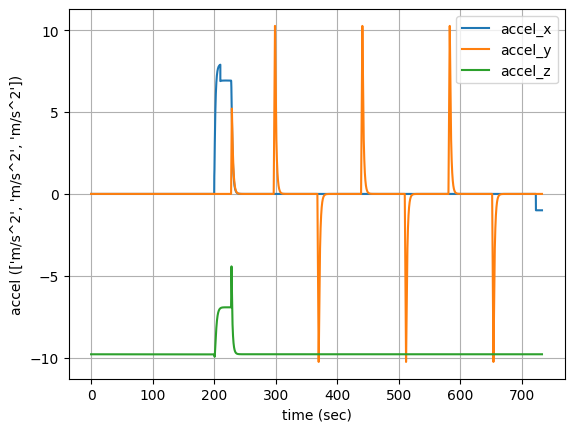

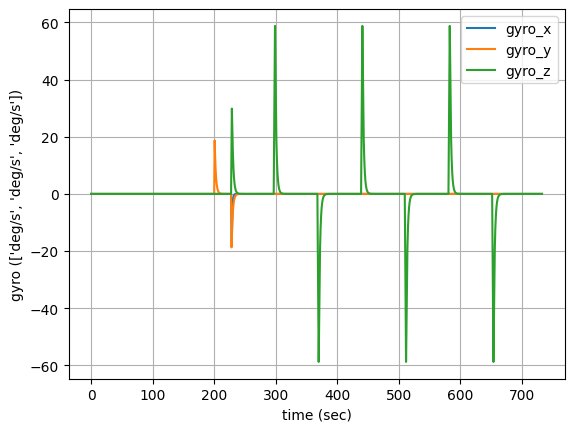

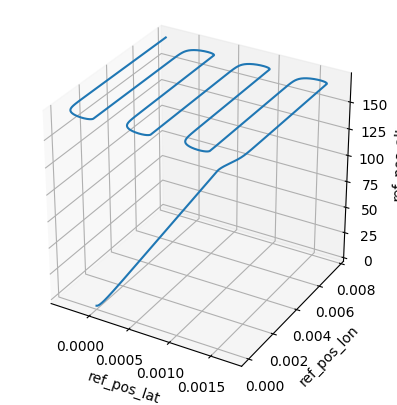

In [2]:
import os
import math
import numpy as np
from gnss_ins_sim.sim import imu_model
from gnss_ins_sim.sim import ins_sim

# globals
D2R = math.pi/180

motion_def_path = os.path.abspath('/workspaces/gnss-ins-sim/demo_motion_def_files//')
fs = 100.0          # IMU sample frequency
fs_gps = 10.0       # GPS sample frequency
fs_mag = fs         # magnetometer sample frequency, not used for now

def gen_data_first(data_dir):
    '''
    Generate data that will be used by test_gen_data_from_files()
    '''
    # imu model
    imu_err = {'gyro_b': np.array([0.0, 0.0, 0.0]) * 3600.0,
               'gyro_arw': np.array([0.0, 0.0, 0.0]) * 1.0,
               'gyro_b_stability': np.array([0.0, 0.0, 0.0]) * 1.0,
               'gyro_b_corr': np.array([100.0, 100.0, 100.0]),
               'accel_b': np.array([0.0, 0.0, 0.0]) * 0.0,
               'accel_vrw': np.array([0.0, 0.0, 0.0]) * 1.0,
               'accel_b_stability': np.array([0.0, 0.0, 0.0]) * 1.0,
               'accel_b_corr': np.array([100.0, 100.0, 100.0]),
               'mag_std': np.array([0.0, 0.0, 0.0]) * 1.0
              }

    imu = imu_model.IMU(accuracy=imu_err, axis=6, gps=False)

    # start simulation
    sim = ins_sim.Sim([fs, fs_gps, fs_mag],
                      motion_def_path+"//motion_def-ins.csv",
                      ref_frame=0,
                      imu=imu,
                      mode=None,
                      env=None,
                      algorithm=None)
    sim.run(10)
    # save simulation data to files
    sim.results(data_dir)

def test_gen_data_from_files(data_dir):
    '''
    test data generation from files.
    '''
    #### start simulation
    #### Algorithm
    # Free integration in a virtual inertial frame
    from demo_algorithms import free_integration
    '''
    Free integration requires initial states (position, velocity and attitude). You should provide
    theses values when you create the algorithm object.
    '''
    ini_pos_vel_att = np.genfromtxt(motion_def_path+"//motion_def-ins.csv",\
                                    delimiter=',', skip_header=1, max_rows=1)
    ini_pos_vel_att[0] = ini_pos_vel_att[0] * D2R
    ini_pos_vel_att[1] = ini_pos_vel_att[1] * D2R
    ini_pos_vel_att[6:9] = ini_pos_vel_att[6:9] * D2R
    # add initial states error if needed
    ini_vel_err = np.array([0.0, 0.0, 0.0]) # initial velocity error in the body frame, m/s
    ini_att_err = np.array([0.0, 0.0, 0.0]) # initial Euler angles error, deg
    ini_pos_vel_att[3:6] += ini_vel_err
    ini_pos_vel_att[6:9] += ini_att_err * D2R
    # create the algorith object
    algo = free_integration.FreeIntegration(ini_pos_vel_att)

    #### start simulation
    sim = ins_sim.Sim([fs, 0.0, 0.0],
                      data_dir,
                      ref_frame=0,
                      imu=None,
                      mode=None,
                      env=None,
                      algorithm=algo)
    # run the simulation for 1000 times
    sim.run(1)
    # generate simulation results, summary
    sim.results('', err_stats_start=-1, gen_kml=True)
    sim.plot(['accel', 'gyro', 'ref_pos'], opt={'ref_pos': '3d'})

if __name__ == '__main__':
    dir_of_logged_files = os.path.abspath('.//demo_saved_data//tmp//')
    gen_data_first(dir_of_logged_files)
    test_gen_data_from_files(dir_of_logged_files)


------------------------------------------------------------
Sample frequency of IMU: [fs] = 100.0 Hz
Reference frame: 0
Simulation time duration: 732.5 s
Simulation runs: 10

------------------------------------------------------------
Simulation results are saved to /workspaces/gnss-ins-sim/work/demo_saved_data/tmp
The following results are saved:
	time: sample time
	ref_pos: true LLA pos in the navigation frame
	ref_vel: true vel in the NED frame
	ref_att_euler: true attitude (Euler angles, ZYX)
	ref_accel: true accel in the body frame
	ref_gyro: true angular velocity in the body frame
	accel: accel measurements
	gyro: gyro measurements
	ref_att_quat: true attitude (quaternion)


------------------------------------------------------------
Sample frequency of IMU: [fs] = 100.0 Hz
Reference frame: 0
Simulation time duration: 732.5 s
Simulation runs: 1

------------------------------------------------------------
Simulation results are saved to /workspaces/gnss-ins-sim/work/demo_save

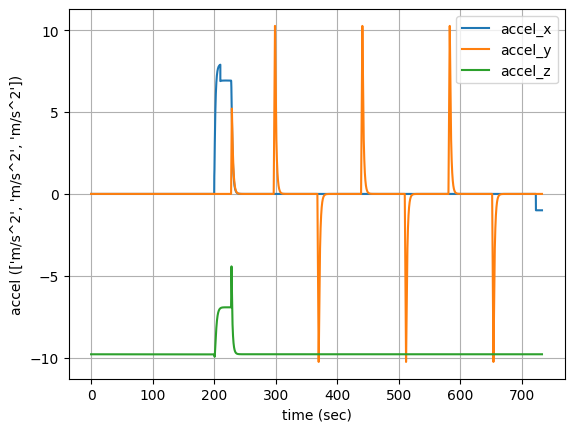

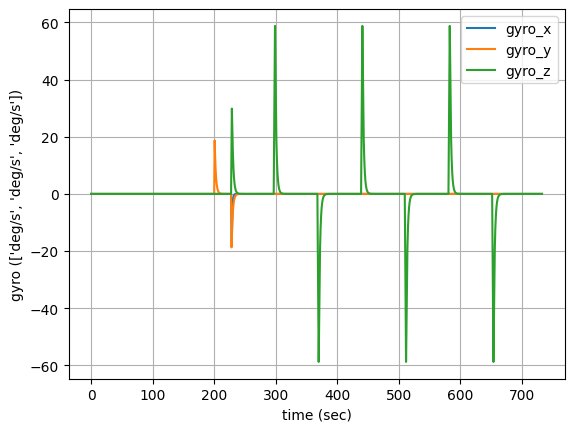

In [3]:
import os
import math
import numpy as np
from gnss_ins_sim.sim import imu_model
from gnss_ins_sim.sim import ins_sim

# globals
D2R = math.pi/180

motion_def_path = os.path.abspath('/workspaces/gnss-ins-sim/demo_motion_def_files//')
fs = 100.0          # IMU sample frequency
fs_gps = 10.0       # GPS sample frequency
fs_mag = fs         # magnetometer sample frequency, not used for now

def gen_data_first(data_dir):
    '''
    Generate data that will be used by test_gen_data_from_files()
    '''
    # imu model
    imu_err = {'gyro_b': np.array([0.0, 0.0, 0.0]) * 3600.0,
               'gyro_arw': np.array([0.0, 0.0, 0.0]) * 1.0,
               'gyro_b_stability': np.array([0.0, 0.0, 0.0]) * 1.0,
               'gyro_b_corr': np.array([100.0, 100.0, 100.0]),
               'accel_b': np.array([0.0, 0.0, 0.0]) * 0.0,
               'accel_vrw': np.array([0.0, 0.0, 0.0]) * 1.0,
               'accel_b_stability': np.array([0.0, 0.0, 0.0]) * 1.0,
               'accel_b_corr': np.array([100.0, 100.0, 100.0]),
               'mag_std': np.array([0.0, 0.0, 0.0]) * 1.0
              }

    imu = imu_model.IMU(accuracy=imu_err, axis=6, gps=False)

    # start simulation
    sim = ins_sim.Sim([fs, fs_gps, fs_mag],
                      motion_def_path+"//motion_def-ins.csv",
                      ref_frame=0,
                      imu=imu,
                      mode=None,
                      env=None,
                      algorithm=None)
    sim.run(10)
    # save simulation data to files
    sim.results(data_dir)

def test_gen_data_from_files(data_dir):
    '''
    test data generation from files.
    '''
    #### start simulation
    #### Algorithm
    # Free integration in a virtual inertial frame
    from demo_algorithms import free_integration
    '''
    Free integration requires initial states (position, velocity and attitude). You should provide
    theses values when you create the algorithm object.
    '''
    ini_pos_vel_att = np.genfromtxt(motion_def_path+"//motion_def-ins.csv",\
                                    delimiter=',', skip_header=1, max_rows=1)
    ini_pos_vel_att[0] = ini_pos_vel_att[0] * D2R
    ini_pos_vel_att[1] = ini_pos_vel_att[1] * D2R
    ini_pos_vel_att[6:9] = ini_pos_vel_att[6:9] * D2R
    # add initial states error if needed
    ini_vel_err = np.array([0.0, 0.0, 0.0]) # initial velocity error in the body frame, m/s
    ini_att_err = np.array([0.0, 0.0, 0.0]) # initial Euler angles error, deg
    ini_pos_vel_att[3:6] += ini_vel_err
    ini_pos_vel_att[6:9] += ini_att_err * D2R
    # create the algorith object
    algo = free_integration.FreeIntegration(ini_pos_vel_att)

    #### start simulation
    sim = ins_sim.Sim([fs, 0.0, 0.0],
                      data_dir,
                      ref_frame=0,
                      imu=None,
                      mode=None,
                      env=None,
                      algorithm=algo)
    # run the simulation for 1000 times
    sim.run(1)
    # generate simulation results, summary
    sim.results('', err_stats_start=-1, gen_kml=True)
    sim.plot(['accel', 'gyro', 'ref_pos, pos'])

if __name__ == '__main__':
    dir_of_logged_files = os.path.abspath('.//demo_saved_data//tmp//')
    gen_data_first(dir_of_logged_files)
    test_gen_data_from_files(dir_of_logged_files)


------------------------------------------------------------
Sample frequency of IMU: [fs] = 100.0 Hz
Reference frame: 0
Simulation time duration: 732.5 s
Simulation runs: 10

------------------------------------------------------------
Simulation results are saved to /workspaces/gnss-ins-sim/work/demo_saved_data/tmp
The following results are saved:
	time: sample time
	ref_pos: true LLA pos in the navigation frame
	ref_vel: true vel in the NED frame
	ref_att_euler: true attitude (Euler angles, ZYX)
	ref_accel: true accel in the body frame
	ref_gyro: true angular velocity in the body frame
	accel: accel measurements
	gyro: gyro measurements
	ref_att_quat: true attitude (quaternion)


------------------------------------------------------------
Sample frequency of IMU: [fs] = 100.0 Hz
Reference frame: 0
Simulation time duration: 732.5 s
Simulation runs: 1

------------------------------------------------------------
Simulation results are saved to /workspaces/gnss-ins-sim/work/demo_save

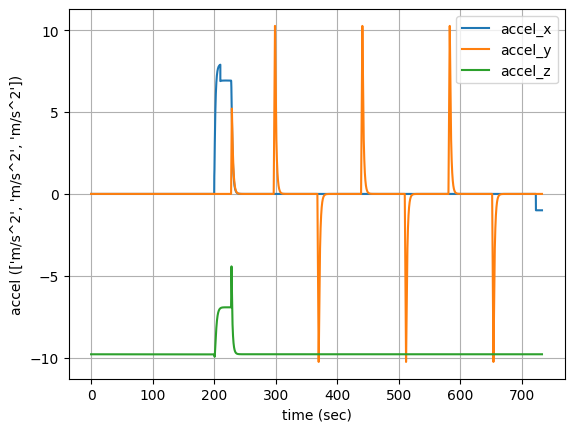

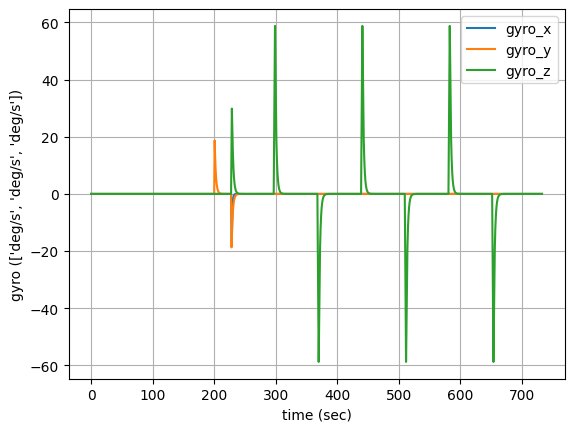

In [4]:
import os
import math
import numpy as np
from gnss_ins_sim.sim import imu_model
from gnss_ins_sim.sim import ins_sim

# globals
D2R = math.pi/180

motion_def_path = os.path.abspath('/workspaces/gnss-ins-sim/demo_motion_def_files//')
fs = 100.0          # IMU sample frequency
fs_gps = 10.0       # GPS sample frequency
fs_mag = fs         # magnetometer sample frequency, not used for now

def gen_data_first(data_dir):
    '''
    Generate data that will be used by test_gen_data_from_files()
    '''
    # imu model
    imu_err = {'gyro_b': np.array([0.0, 0.0, 0.0]) * 3600.0,
               'gyro_arw': np.array([0.0, 0.0, 0.0]) * 1.0,
               'gyro_b_stability': np.array([0.0, 0.0, 0.0]) * 1.0,
               'gyro_b_corr': np.array([100.0, 100.0, 100.0]),
               'accel_b': np.array([0.0, 0.0, 0.0]) * 0.0,
               'accel_vrw': np.array([0.0, 0.0, 0.0]) * 1.0,
               'accel_b_stability': np.array([0.0, 0.0, 0.0]) * 1.0,
               'accel_b_corr': np.array([100.0, 100.0, 100.0]),
               'mag_std': np.array([0.0, 0.0, 0.0]) * 1.0
              }

    imu = imu_model.IMU(accuracy=imu_err, axis=6, gps=False)

    # start simulation
    sim = ins_sim.Sim([fs, fs_gps, fs_mag],
                      motion_def_path+"//motion_def-ins.csv",
                      ref_frame=0,
                      imu=imu,
                      mode=None,
                      env=None,
                      algorithm=None)
    sim.run(10)
    # save simulation data to files
    sim.results(data_dir)

def test_gen_data_from_files(data_dir):
    '''
    test data generation from files.
    '''
    #### start simulation
    #### Algorithm
    # Free integration in a virtual inertial frame
    from demo_algorithms import free_integration
    '''
    Free integration requires initial states (position, velocity and attitude). You should provide
    theses values when you create the algorithm object.
    '''
    ini_pos_vel_att = np.genfromtxt(motion_def_path+"//motion_def-ins.csv",\
                                    delimiter=',', skip_header=1, max_rows=1)
    ini_pos_vel_att[0] = ini_pos_vel_att[0] * D2R
    ini_pos_vel_att[1] = ini_pos_vel_att[1] * D2R
    ini_pos_vel_att[6:9] = ini_pos_vel_att[6:9] * D2R
    # add initial states error if needed
    ini_vel_err = np.array([0.0, 0.0, 0.0]) # initial velocity error in the body frame, m/s
    ini_att_err = np.array([0.0, 0.0, 0.0]) # initial Euler angles error, deg
    ini_pos_vel_att[3:6] += ini_vel_err
    ini_pos_vel_att[6:9] += ini_att_err * D2R
    # create the algorith object
    algo = free_integration.FreeIntegration(ini_pos_vel_att)

    #### start simulation
    sim = ins_sim.Sim([fs, 0.0, 0.0],
                      data_dir,
                      ref_frame=0,
                      imu=None,
                      mode=None,
                      env=None,
                      algorithm=algo)
    # run the simulation for 1000 times
    sim.run(1)
    # generate simulation results, summary
    sim.results('', err_stats_start=-1, gen_kml=True)
    sim.plot(['accel', 'gyro', 'ref_pos;pos'])

if __name__ == '__main__':
    dir_of_logged_files = os.path.abspath('.//demo_saved_data//tmp//')
    gen_data_first(dir_of_logged_files)
    test_gen_data_from_files(dir_of_logged_files)

In [5]:
import os
import math
import numpy as np
from gnss_ins_sim.sim import imu_model
from gnss_ins_sim.sim import ins_sim

# globals
D2R = math.pi/180

motion_def_path = os.path.abspath('/workspaces/gnss-ins-sim/demo_motion_def_files//')
fs = 100.0          # IMU sample frequency
fs_gps = 10.0       # GPS sample frequency
fs_mag = fs         # magnetometer sample frequency, not used for now

def gen_data_first(data_dir):
    '''
    Generate data that will be used by test_gen_data_from_files()
    '''
    # imu model
    """
    imu_err = {'gyro_b': np.array([0.0, 0.0, 0.0]) * 3600.0,
               'gyro_arw': np.array([0.0, 0.0, 0.0]) * 1.0,
               'gyro_b_stability': np.array([0.0, 0.0, 0.0]) * 1.0,
               'gyro_b_corr': np.array([100.0, 100.0, 100.0]),
               'accel_b': np.array([0.0, 0.0, 0.0]) * 0.0,
               'accel_vrw': np.array([0.0, 0.0, 0.0]) * 1.0,
               'accel_b_stability': np.array([0.0, 0.0, 0.0]) * 1.0,
               'accel_b_corr': np.array([100.0, 100.0, 100.0]),
               'mag_std': np.array([0.0, 0.0, 0.0]) * 1.0
              }
    """

    imu = imu_model.IMU(accuracy='high-accuracity', axis=6, gps=False)

    # start simulation
    sim = ins_sim.Sim([fs, fs_gps, fs_mag],
                      motion_def_path+"//motion_def-ins.csv",
                      ref_frame=0,
                      imu=imu,
                      mode=None,
                      env=None,
                      algorithm=None)
    sim.run(10)
    # save simulation data to files
    sim.results(data_dir)

def test_gen_data_from_files(data_dir):
    '''
    test data generation from files.
    '''
    #### start simulation
    #### Algorithm
    # Free integration in a virtual inertial frame
    from demo_algorithms import free_integration
    '''
    Free integration requires initial states (position, velocity and attitude). You should provide
    theses values when you create the algorithm object.
    '''
    ini_pos_vel_att = np.genfromtxt(motion_def_path+"//motion_def-ins.csv",\
                                    delimiter=',', skip_header=1, max_rows=1)
    ini_pos_vel_att[0] = ini_pos_vel_att[0] * D2R
    ini_pos_vel_att[1] = ini_pos_vel_att[1] * D2R
    ini_pos_vel_att[6:9] = ini_pos_vel_att[6:9] * D2R
    # add initial states error if needed
    ini_vel_err = np.array([0.0, 0.0, 0.0]) # initial velocity error in the body frame, m/s
    ini_att_err = np.array([0.0, 0.0, 0.0]) # initial Euler angles error, deg
    ini_pos_vel_att[3:6] += ini_vel_err
    ini_pos_vel_att[6:9] += ini_att_err * D2R
    # create the algorith object
    algo = free_integration.FreeIntegration(ini_pos_vel_att)

    #### start simulation
    sim = ins_sim.Sim([fs, 0.0, 0.0],
                      data_dir,
                      ref_frame=0,
                      imu=None,
                      mode=None,
                      env=None,
                      algorithm=algo)
    # run the simulation for 1000 times
    sim.run(1)
    # generate simulation results, summary
    sim.results('', err_stats_start=-1, gen_kml=True)
    sim.plot(['accel', 'gyro', 'ref_pos'])

if __name__ == '__main__':
    dir_of_logged_files = os.path.abspath('.//demo_saved_data//tmp//')
    gen_data_first(dir_of_logged_files)
    test_gen_data_from_files(dir_of_logged_files)

ValueError: accuracy is not a valid string.


------------------------------------------------------------
Sample frequency of IMU: [fs] = 100.0 Hz
Reference frame: 0
Simulation time duration: 732.5 s
Simulation runs: 10

------------------------------------------------------------
Simulation results are saved to /workspaces/gnss-ins-sim/work/demo_saved_data/tmp
The following results are saved:
	time: sample time
	ref_pos: true LLA pos in the navigation frame
	ref_vel: true vel in the NED frame
	ref_att_euler: true attitude (Euler angles, ZYX)
	ref_accel: true accel in the body frame
	ref_gyro: true angular velocity in the body frame
	accel: accel measurements
	gyro: gyro measurements
	ref_att_quat: true attitude (quaternion)


------------------------------------------------------------
Sample frequency of IMU: [fs] = 100.0 Hz
Reference frame: 0
Simulation time duration: 732.5 s
Simulation runs: 1

------------------------------------------------------------
Simulation results are saved to /workspaces/gnss-ins-sim/work/demo_save

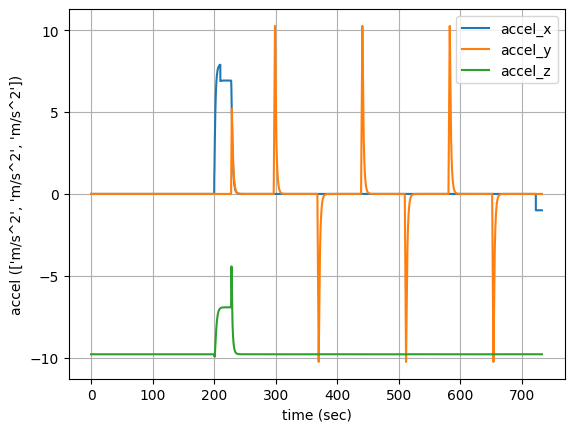

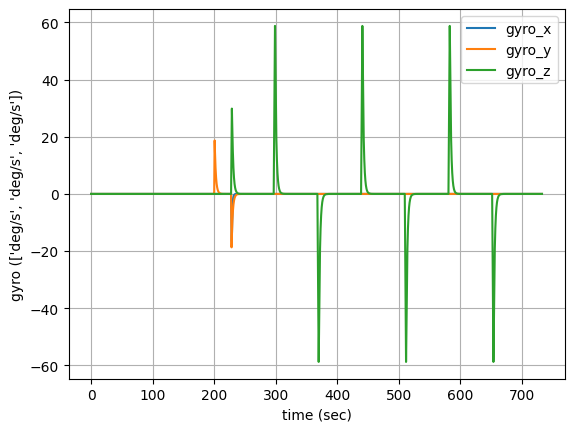

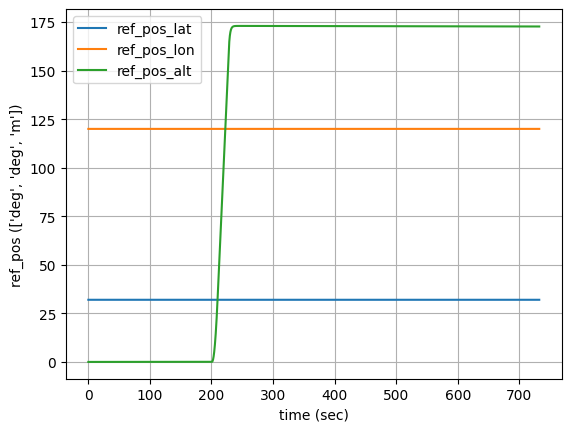

In [6]:
import os
import math
import numpy as np
from gnss_ins_sim.sim import imu_model
from gnss_ins_sim.sim import ins_sim

# globals
D2R = math.pi/180

motion_def_path = os.path.abspath('/workspaces/gnss-ins-sim/demo_motion_def_files//')
fs = 100.0          # IMU sample frequency
fs_gps = 10.0       # GPS sample frequency
fs_mag = fs         # magnetometer sample frequency, not used for now

def gen_data_first(data_dir):
    '''
    Generate data that will be used by test_gen_data_from_files()
    '''
    # imu model
    """
    imu_err = {'gyro_b': np.array([0.0, 0.0, 0.0]) * 3600.0,
               'gyro_arw': np.array([0.0, 0.0, 0.0]) * 1.0,
               'gyro_b_stability': np.array([0.0, 0.0, 0.0]) * 1.0,
               'gyro_b_corr': np.array([100.0, 100.0, 100.0]),
               'accel_b': np.array([0.0, 0.0, 0.0]) * 0.0,
               'accel_vrw': np.array([0.0, 0.0, 0.0]) * 1.0,
               'accel_b_stability': np.array([0.0, 0.0, 0.0]) * 1.0,
               'accel_b_corr': np.array([100.0, 100.0, 100.0]),
               'mag_std': np.array([0.0, 0.0, 0.0]) * 1.0
              }
    """

    imu = imu_model.IMU(accuracy='high-accuracy', axis=6, gps=False)

    # start simulation
    sim = ins_sim.Sim([fs, fs_gps, fs_mag],
                      motion_def_path+"//motion_def-ins.csv",
                      ref_frame=0,
                      imu=imu,
                      mode=None,
                      env=None,
                      algorithm=None)
    sim.run(10)
    # save simulation data to files
    sim.results(data_dir)

def test_gen_data_from_files(data_dir):
    '''
    test data generation from files.
    '''
    #### start simulation
    #### Algorithm
    # Free integration in a virtual inertial frame
    from demo_algorithms import free_integration
    '''
    Free integration requires initial states (position, velocity and attitude). You should provide
    theses values when you create the algorithm object.
    '''
    ini_pos_vel_att = np.genfromtxt(motion_def_path+"//motion_def-ins.csv",\
                                    delimiter=',', skip_header=1, max_rows=1)
    ini_pos_vel_att[0] = ini_pos_vel_att[0] * D2R
    ini_pos_vel_att[1] = ini_pos_vel_att[1] * D2R
    ini_pos_vel_att[6:9] = ini_pos_vel_att[6:9] * D2R
    # add initial states error if needed
    ini_vel_err = np.array([0.0, 0.0, 0.0]) # initial velocity error in the body frame, m/s
    ini_att_err = np.array([0.0, 0.0, 0.0]) # initial Euler angles error, deg
    ini_pos_vel_att[3:6] += ini_vel_err
    ini_pos_vel_att[6:9] += ini_att_err * D2R
    # create the algorith object
    algo = free_integration.FreeIntegration(ini_pos_vel_att)

    #### start simulation
    sim = ins_sim.Sim([fs, 0.0, 0.0],
                      data_dir,
                      ref_frame=0,
                      imu=None,
                      mode=None,
                      env=None,
                      algorithm=algo)
    # run the simulation for 1000 times
    sim.run(1)
    # generate simulation results, summary
    sim.results('', err_stats_start=-1, gen_kml=True)
    sim.plot(['accel', 'gyro', 'ref_pos'])

if __name__ == '__main__':
    dir_of_logged_files = os.path.abspath('.//demo_saved_data//tmp//')
    gen_data_first(dir_of_logged_files)
    test_gen_data_from_files(dir_of_logged_files)


------------------------------------------------------------
Sample frequency of IMU: [fs] = 100.0 Hz
Reference frame: 1
Simulation time duration: 732.5 s
Simulation runs: 10

------------------------------------------------------------
Simulation results are saved to /workspaces/gnss-ins-sim/work/demo_saved_data/tmp
The following results are saved:
	time: sample time
	ref_pos: true position in the local NED frame
	ref_vel: true vel in the NED frame
	ref_att_euler: true attitude (Euler angles, ZYX)
	ref_accel: true accel in the body frame
	ref_gyro: true angular velocity in the body frame
	accel: accel measurements
	gyro: gyro measurements
	ref_att_quat: true attitude (quaternion)

Unsupported position conversion from xyz to LLA.

------------------------------------------------------------
Sample frequency of IMU: [fs] = 100.0 Hz
Reference frame: 0
Simulation time duration: 732.5 s
Simulation runs: 1

------------------------------------------------------------
Simulation results are

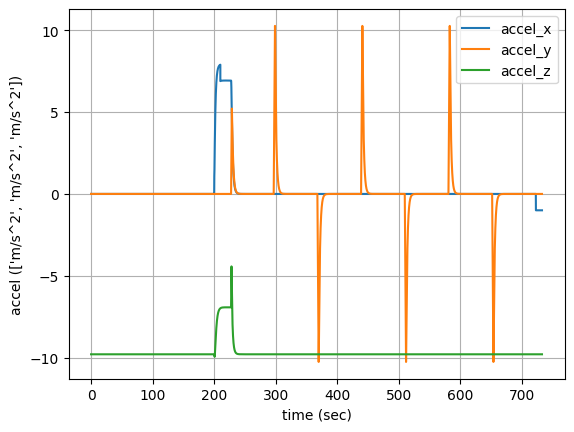

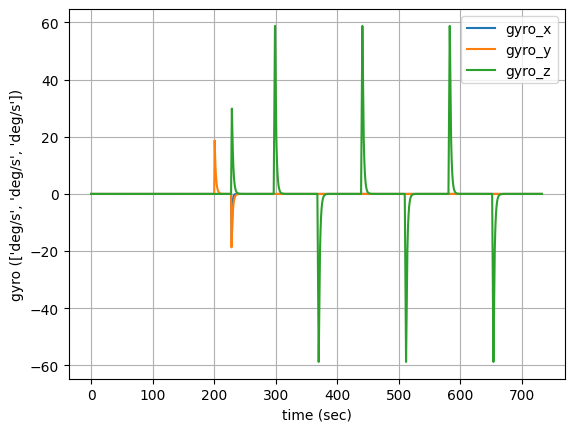

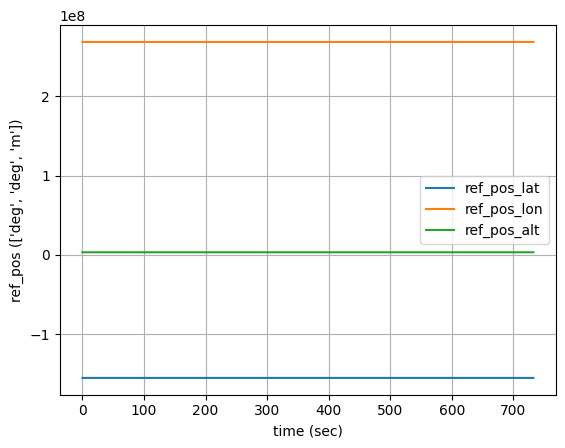

In [7]:
import os
import math
import numpy as np
from gnss_ins_sim.sim import imu_model
from gnss_ins_sim.sim import ins_sim

# globals
D2R = math.pi/180

motion_def_path = os.path.abspath('/workspaces/gnss-ins-sim/demo_motion_def_files//')
fs = 100.0          # IMU sample frequency
fs_gps = 10.0       # GPS sample frequency
fs_mag = fs         # magnetometer sample frequency, not used for now

def gen_data_first(data_dir):
    '''
    Generate data that will be used by test_gen_data_from_files()
    '''
    # imu model
    """
    imu_err = {'gyro_b': np.array([0.0, 0.0, 0.0]) * 3600.0,
               'gyro_arw': np.array([0.0, 0.0, 0.0]) * 1.0,
               'gyro_b_stability': np.array([0.0, 0.0, 0.0]) * 1.0,
               'gyro_b_corr': np.array([100.0, 100.0, 100.0]),
               'accel_b': np.array([0.0, 0.0, 0.0]) * 0.0,
               'accel_vrw': np.array([0.0, 0.0, 0.0]) * 1.0,
               'accel_b_stability': np.array([0.0, 0.0, 0.0]) * 1.0,
               'accel_b_corr': np.array([100.0, 100.0, 100.0]),
               'mag_std': np.array([0.0, 0.0, 0.0]) * 1.0
              }
    """

    imu = imu_model.IMU(accuracy='high-accuracy', axis=6, gps=False)

    # start simulation
    sim = ins_sim.Sim([fs, fs_gps, fs_mag],
                      motion_def_path+"//motion_def-ins.csv",
                      ref_frame=1,
                      imu=imu,
                      mode=None,
                      env=None,
                      algorithm=None)
    sim.run(10)
    # save simulation data to files
    sim.results(data_dir)

def test_gen_data_from_files(data_dir):
    '''
    test data generation from files.
    '''
    #### start simulation
    #### Algorithm
    # Free integration in a virtual inertial frame
    from demo_algorithms import free_integration
    '''
    Free integration requires initial states (position, velocity and attitude). You should provide
    theses values when you create the algorithm object.
    '''
    ini_pos_vel_att = np.genfromtxt(motion_def_path+"//motion_def-ins.csv",\
                                    delimiter=',', skip_header=1, max_rows=1)
    ini_pos_vel_att[0] = ini_pos_vel_att[0] * D2R
    ini_pos_vel_att[1] = ini_pos_vel_att[1] * D2R
    ini_pos_vel_att[6:9] = ini_pos_vel_att[6:9] * D2R
    # add initial states error if needed
    ini_vel_err = np.array([0.0, 0.0, 0.0]) # initial velocity error in the body frame, m/s
    ini_att_err = np.array([0.0, 0.0, 0.0]) # initial Euler angles error, deg
    ini_pos_vel_att[3:6] += ini_vel_err
    ini_pos_vel_att[6:9] += ini_att_err * D2R
    # create the algorith object
    algo = free_integration.FreeIntegration(ini_pos_vel_att)

    #### start simulation
    sim = ins_sim.Sim([fs, 0.0, 0.0],
                      data_dir,
                      ref_frame=0,
                      imu=None,
                      mode=None,
                      env=None,
                      algorithm=algo)
    # run the simulation for 1000 times
    sim.run(1)
    # generate simulation results, summary
    sim.results('', err_stats_start=-1, gen_kml=True)
    sim.plot(['accel', 'gyro', 'ref_pos'])

if __name__ == '__main__':
    dir_of_logged_files = os.path.abspath('.//demo_saved_data//tmp//')
    gen_data_first(dir_of_logged_files)
    test_gen_data_from_files(dir_of_logged_files)


------------------------------------------------------------
Sample frequency of IMU: [fs] = 100.0 Hz
Reference frame: 0
Simulation time duration: 732.5 s
Simulation runs: 10

------------------------------------------------------------
Simulation results are saved to /workspaces/gnss-ins-sim/work/demo_saved_data/tmp
The following results are saved:
	time: sample time
	ref_pos: true LLA pos in the navigation frame
	ref_vel: true vel in the NED frame
	ref_att_euler: true attitude (Euler angles, ZYX)
	ref_accel: true accel in the body frame
	ref_gyro: true angular velocity in the body frame
	accel: accel measurements
	gyro: gyro measurements
	ref_att_quat: true attitude (quaternion)


------------------------------------------------------------
Sample frequency of IMU: [fs] = 100.0 Hz
Reference frame: 0
Simulation time duration: 732.5 s
Simulation runs: 1

------------------------------------------------------------
Simulation results are saved to /workspaces/gnss-ins-sim/work/demo_save

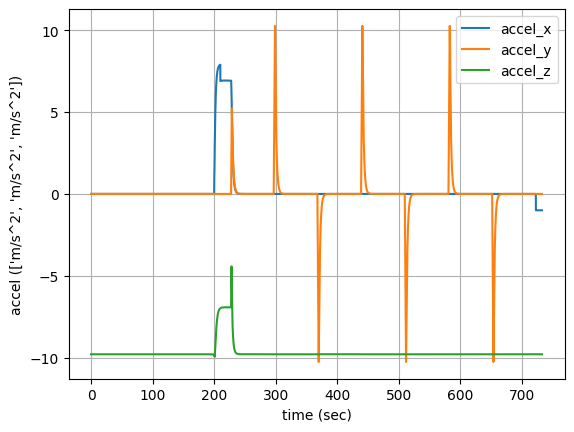

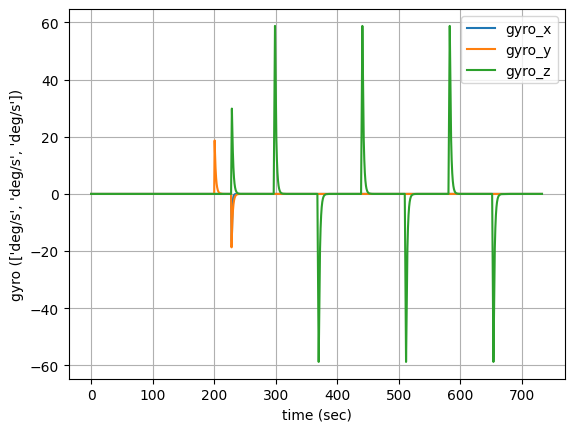

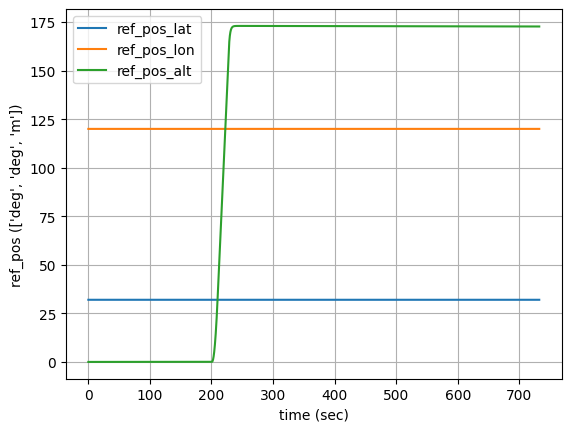

In [8]:
import os
import math
import numpy as np
from gnss_ins_sim.sim import imu_model
from gnss_ins_sim.sim import ins_sim

# globals
D2R = math.pi/180

motion_def_path = os.path.abspath('/workspaces/gnss-ins-sim/demo_motion_def_files//')
fs = 100.0          # IMU sample frequency
fs_gps = 10.0       # GPS sample frequency
fs_mag = fs         # magnetometer sample frequency, not used for now

def gen_data_first(data_dir):
    '''
    Generate data that will be used by test_gen_data_from_files()
    '''
    # imu model
    """
    imu_err = {'gyro_b': np.array([0.0, 0.0, 0.0]) * 3600.0,
               'gyro_arw': np.array([0.0, 0.0, 0.0]) * 1.0,
               'gyro_b_stability': np.array([0.0, 0.0, 0.0]) * 1.0,
               'gyro_b_corr': np.array([100.0, 100.0, 100.0]),
               'accel_b': np.array([0.0, 0.0, 0.0]) * 0.0,
               'accel_vrw': np.array([0.0, 0.0, 0.0]) * 1.0,
               'accel_b_stability': np.array([0.0, 0.0, 0.0]) * 1.0,
               'accel_b_corr': np.array([100.0, 100.0, 100.0]),
               'mag_std': np.array([0.0, 0.0, 0.0]) * 1.0
              }
    """

    imu = imu_model.IMU(accuracy='high-accuracy', axis=6, gps=False)

    # start simulation
    sim = ins_sim.Sim([fs, fs_gps, fs_mag],
                      motion_def_path+"//motion_def-ins.csv",
                      ref_frame=0,
                      imu=imu,
                      mode=None,
                      env=None,
                      algorithm=None)
    sim.run(10)
    # save simulation data to files
    sim.results(data_dir)

def test_gen_data_from_files(data_dir):
    '''
    test data generation from files.
    '''
    #### start simulation
    #### Algorithm
    # Free integration in a virtual inertial frame
    from demo_algorithms import free_integration
    '''
    Free integration requires initial states (position, velocity and attitude). You should provide
    theses values when you create the algorithm object.
    '''
    ini_pos_vel_att = np.genfromtxt(motion_def_path+"//motion_def-ins.csv",\
                                    delimiter=',', skip_header=1, max_rows=1)
    ini_pos_vel_att[0] = ini_pos_vel_att[0] * D2R
    ini_pos_vel_att[1] = ini_pos_vel_att[1] * D2R
    ini_pos_vel_att[6:9] = ini_pos_vel_att[6:9] * D2R
    # add initial states error if needed
    ini_vel_err = np.array([0.0, 0.0, 0.0]) # initial velocity error in the body frame, m/s
    ini_att_err = np.array([0.0, 0.0, 0.0]) # initial Euler angles error, deg
    ini_pos_vel_att[3:6] += ini_vel_err
    ini_pos_vel_att[6:9] += ini_att_err * D2R
    # create the algorith object
    algo = free_integration.FreeIntegration(ini_pos_vel_att)

    #### start simulation
    sim = ins_sim.Sim([fs, 0.0, 0.0],
                      data_dir,
                      ref_frame=0,
                      imu=None,
                      mode=None,
                      env=None,
                      algorithm=algo)
    # run the simulation for 1000 times
    sim.run(1)
    # generate simulation results, summary
    sim.results('', err_stats_start=-1, gen_kml=True)
    sim.plot(['accel', 'gyro', 'ref_pos'])

if __name__ == '__main__':
    dir_of_logged_files = os.path.abspath('.//demo_saved_data//tmp//')
    gen_data_first(dir_of_logged_files)
    test_gen_data_from_files(dir_of_logged_files)


------------------------------------------------------------
Sample frequency of IMU: [fs] = 100.0 Hz
Reference frame: 0
Simulation time duration: 732.5 s
Simulation runs: 10

------------------------------------------------------------
Simulation results are saved to /workspaces/gnss-ins-sim/work/demo_saved_data/tmp
The following results are saved:
	time: sample time
	ref_pos: true LLA pos in the navigation frame
	ref_vel: true vel in the NED frame
	ref_att_euler: true attitude (Euler angles, ZYX)
	ref_accel: true accel in the body frame
	ref_gyro: true angular velocity in the body frame
	accel: accel measurements
	gyro: gyro measurements
	ref_att_quat: true attitude (quaternion)


------------------------------------------------------------
Sample frequency of IMU: [fs] = 100.0 Hz
Reference frame: 0
Simulation time duration: 732.5 s
Simulation runs: 1

------------------------------------------------------------
Simulation results are saved to /workspaces/gnss-ins-sim/work/demo_save

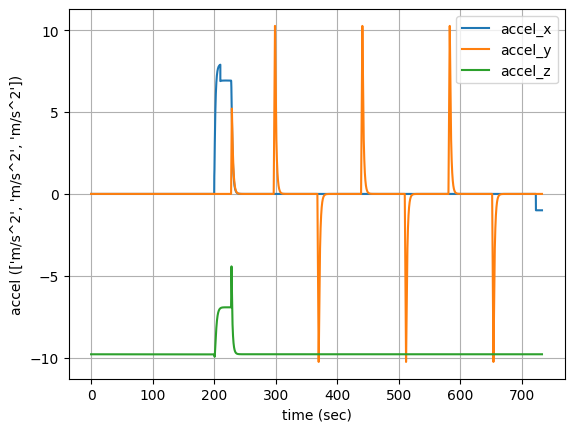

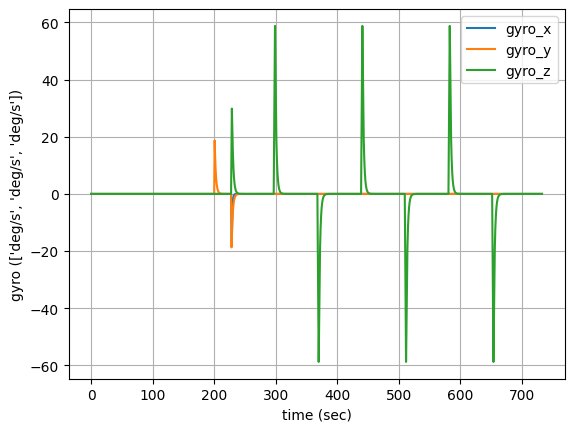

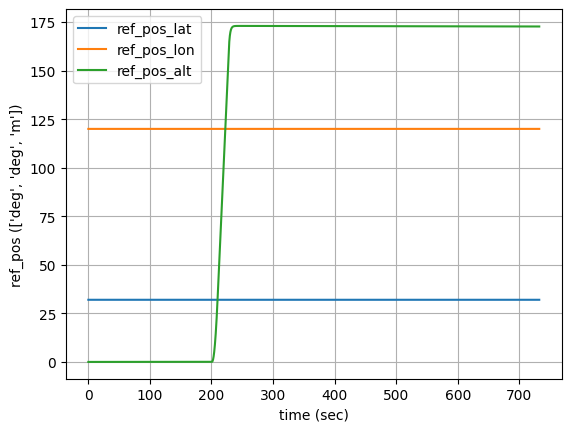

: 

In [9]:
import os
import math
import numpy as np
from gnss_ins_sim.sim import imu_model
from gnss_ins_sim.sim import ins_sim

# globals
D2R = math.pi/180

motion_def_path = os.path.abspath('/workspaces/gnss-ins-sim/demo_motion_def_files//')
fs = 100.0          # IMU sample frequency
fs_gps = 10.0       # GPS sample frequency
fs_mag = fs         # magnetometer sample frequency, not used for now

def gen_data_first(data_dir):
    '''
    Generate data that will be used by test_gen_data_from_files()
    '''
    # imu model
 
    imu_err = {'gyro_b': np.array([0.0, 0.0, 0.0]) * 3600.0,
               'gyro_arw': np.array([0.0, 0.0, 0.0]) * 1.0,
               'gyro_b_stability': np.array([0.0, 0.0, 0.0]) * 1.0,
               'gyro_b_corr': np.array([100.0, 100.0, 100.0]),
               'accel_b': np.array([0.0, 0.0, 0.0]) * 0.0,
               'accel_vrw': np.array([0.0, 0.0, 0.0]) * 1.0,
               'accel_b_stability': np.array([0.0, 0.0, 0.0]) * 1.0,
               'accel_b_corr': np.array([100.0, 100.0, 100.0]),
               'mag_std': np.array([0.0, 0.0, 0.0]) * 1.0
              }


    imu = imu_model.IMU(accuracy=imu_err, axis=6, gps=False)

    # start simulation
    sim = ins_sim.Sim([fs, fs_gps, fs_mag],
                      motion_def_path+"//motion_def-ins.csv",
                      ref_frame=0,
                      imu=imu,
                      mode=None,
                      env=None,
                      algorithm=None)
    sim.run(10)
    # save simulation data to files
    sim.results(data_dir)

def test_gen_data_from_files(data_dir):
    '''
    test data generation from files.
    '''
    #### start simulation
    #### Algorithm
    # Free integration in a virtual inertial frame
    from demo_algorithms import free_integration
    '''
    Free integration requires initial states (position, velocity and attitude). You should provide
    theses values when you create the algorithm object.
    '''
    ini_pos_vel_att = np.genfromtxt(motion_def_path+"//motion_def-ins.csv",\
                                    delimiter=',', skip_header=1, max_rows=1)
    ini_pos_vel_att[0] = ini_pos_vel_att[0] * D2R
    ini_pos_vel_att[1] = ini_pos_vel_att[1] * D2R
    ini_pos_vel_att[6:9] = ini_pos_vel_att[6:9] * D2R
    # add initial states error if needed
    ini_vel_err = np.array([0.0, 0.0, 0.0]) # initial velocity error in the body frame, m/s
    ini_att_err = np.array([0.0, 0.0, 0.0]) # initial Euler angles error, deg
    ini_pos_vel_att[3:6] += ini_vel_err
    ini_pos_vel_att[6:9] += ini_att_err * D2R
    # create the algorith object
    algo = free_integration.FreeIntegration(ini_pos_vel_att)

    #### start simulation
    sim = ins_sim.Sim([fs, 0.0, 0.0],
                      data_dir,
                      ref_frame=0,
                      imu=None,
                      mode=None,
                      env=None,
                      algorithm=algo)
    # run the simulation for 1000 times
    sim.run(1)
    # generate simulation results, summary
    sim.results('', err_stats_start=-1, gen_kml=True)
    sim.plot(['accel', 'gyro', 'ref_pos'])

if __name__ == '__main__':
    dir_of_logged_files = os.path.abspath('.//demo_saved_data//tmp//')
    gen_data_first(dir_of_logged_files)
    test_gen_data_from_files(dir_of_logged_files)

In [ ]:
import os
import math
import numpy as np
from gnss_ins_sim.sim import imu_model
from gnss_ins_sim.sim import ins_sim

# globals
D2R = math.pi/180

motion_def_path = os.path.abspath('/workspaces/gnss-ins-sim/demo_motion_def_files//')
fs = 100.0          # IMU sample frequency
fs_gps = 10.0       # GPS sample frequency
fs_mag = fs         # magnetometer sample frequency, not used for now

def gen_data_first(data_dir):
    '''
    Generate data that will be used by test_gen_data_from_files()
    '''
    # imu model
 
    imu_err = {'gyro_b': np.array([0.0, 0.0, 0.0]) * 3600.0,
               'gyro_arw': np.array([0.0, 0.0, 0.0]) * 1.0,
               'gyro_b_stability': np.array([0.0, 0.0, 0.0]) * 1.0,
               'gyro_b_corr': np.array([100.0, 100.0, 100.0]),
               'accel_b': np.array([0.0, 0.0, 0.0]) * 0.0,
               'accel_vrw': np.array([0.0, 0.0, 0.0]) * 1.0,
               'accel_b_stability': np.array([0.0, 0.0, 0.0]) * 1.0,
               'accel_b_corr': np.array([100.0, 100.0, 100.0]),
               'mag_std': np.array([0.0, 0.0, 0.0]) * 1.0
              }


    imu = imu_model.IMU(accuracy=imu_err, axis=6, gps=False)

    # start simulation
    sim = ins_sim.Sim([fs, fs_gps, fs_mag],
                      motion_def_path+"//motion_def-ins.csv",
                      ref_frame=0,
                      imu=imu,
                      mode=None,
                      env=None,
                      algorithm=None)
    sim.run(10)
    # save simulation data to files
    sim.results(data_dir)

def test_gen_data_from_files(data_dir):
    '''
    test data generation from files.
    '''
    #### start simulation
    #### Algorithm
    # Free integration in a virtual inertial frame
    from demo_algorithms import free_integration
    '''
    Free integration requires initial states (position, velocity and attitude). You should provide
    theses values when you create the algorithm object.
    '''
    ini_pos_vel_att = np.genfromtxt(motion_def_path+"//motion_def-ins.csv",\
                                    delimiter=',', skip_header=1, max_rows=1)
    ini_pos_vel_att[0] = ini_pos_vel_att[0] * D2R
    ini_pos_vel_att[1] = ini_pos_vel_att[1] * D2R
    ini_pos_vel_att[6:9] = ini_pos_vel_att[6:9] * D2R
    # add initial states error if needed
    ini_vel_err = np.array([0.0, 0.0, 0.0]) # initial velocity error in the body frame, m/s
    ini_att_err = np.array([0.0, 0.0, 0.0]) # initial Euler angles error, deg
    ini_pos_vel_att[3:6] += ini_vel_err
    ini_pos_vel_att[6:9] += ini_att_err * D2R
    # create the algorith object
    algo = free_integration.FreeIntegration(ini_pos_vel_att)

    #### start simulation
    sim = ins_sim.Sim([fs, 0.0, 0.0],
                      data_dir,
                      ref_frame=0,
                      imu=None,
                      mode=None,
                      env=None,
                      algorithm=algo)
    # run the simulation for 1000 times
    sim.run(1)
    # generate simulation results, summary
    sim.results('', err_stats_start=-1, gen_kml=True)
    sim.plot(['accel', 'gyro'])

if __name__ == '__main__':
    dir_of_logged_files = os.path.abspath('.//demo_saved_data//tmp//')
    gen_data_first(dir_of_logged_files)
    test_gen_data_from_files(dir_of_logged_files)


------------------------------------------------------------
Sample frequency of IMU: [fs] = 100.0 Hz
Reference frame: 0
Simulation time duration: 732.5 s
Simulation runs: 10

------------------------------------------------------------
Simulation results are saved to /workspaces/gnss-ins-sim/work/demo_saved_data/tmp
The following results are saved:
	time: sample time
	ref_pos: true LLA pos in the navigation frame
	ref_vel: true vel in the NED frame
	ref_att_euler: true attitude (Euler angles, ZYX)
	ref_accel: true accel in the body frame
	ref_gyro: true angular velocity in the body frame
	accel: accel measurements
	gyro: gyro measurements
	ref_att_quat: true attitude (quaternion)


------------------------------------------------------------
Sample frequency of IMU: [fs] = 100.0 Hz
Reference frame: 0
Simulation time duration: 732.5 s
Simulation runs: 1

------------------------------------------------------------
Simulation results are saved to /workspaces/gnss-ins-sim/work/demo_save

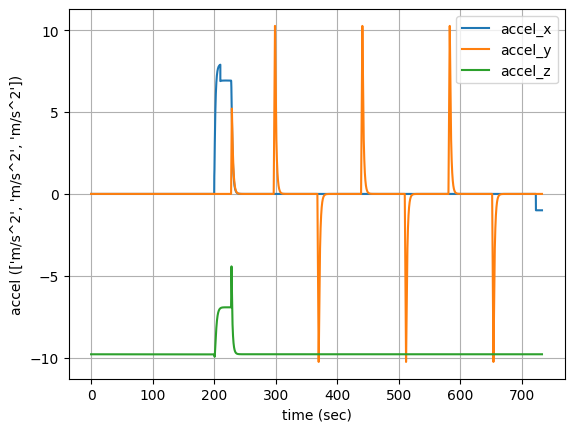

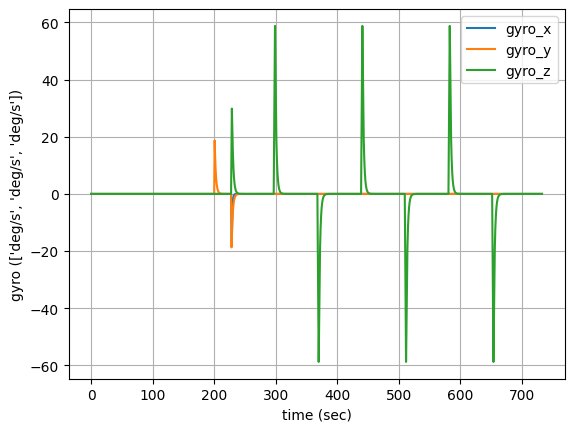

In [1]:
import os
import math
import numpy as np
from gnss_ins_sim.sim import imu_model
from gnss_ins_sim.sim import ins_sim

# globals
D2R = math.pi/180

motion_def_path = os.path.abspath('/workspaces/gnss-ins-sim/demo_motion_def_files//')
fs = 100.0          # IMU sample frequency
fs_gps = 10.0       # GPS sample frequency
fs_mag = fs         # magnetometer sample frequency, not used for now

def gen_data_first(data_dir):
    '''
    Generate data that will be used by test_gen_data_from_files()
    '''
    # imu model
 
    imu_err = {'gyro_b': np.array([0.0, 0.0, 0.0]) * 3600.0,
               'gyro_arw': np.array([0.0, 0.0, 0.0]) * 1.0,
               'gyro_b_stability': np.array([0.0, 0.0, 0.0]) * 1.0,
               'gyro_b_corr': np.array([100.0, 100.0, 100.0]),
               'accel_b': np.array([0.0, 0.0, 0.0]) * 0.0,
               'accel_vrw': np.array([0.0, 0.0, 0.0]) * 1.0,
               'accel_b_stability': np.array([0.0, 0.0, 0.0]) * 1.0,
               'accel_b_corr': np.array([100.0, 100.0, 100.0]),
               'mag_std': np.array([0.0, 0.0, 0.0]) * 1.0
              }


    imu = imu_model.IMU(accuracy=imu_err, axis=6, gps=False)

    # start simulation
    sim = ins_sim.Sim([fs, fs_gps, fs_mag],
                      motion_def_path+"//motion_def-ins.csv",
                      ref_frame=0,
                      imu=imu,
                      mode=None,
                      env=None,
                      algorithm=None)
    sim.run(10)
    # save simulation data to files
    sim.results(data_dir)

def test_gen_data_from_files(data_dir):
    '''
    test data generation from files.
    '''
    #### start simulation
    #### Algorithm
    # Free integration in a virtual inertial frame
    from demo_algorithms import free_integration
    '''
    Free integration requires initial states (position, velocity and attitude). You should provide
    theses values when you create the algorithm object.
    '''
    ini_pos_vel_att = np.genfromtxt(motion_def_path+"//motion_def-ins.csv",\
                                    delimiter=',', skip_header=1, max_rows=1)
    ini_pos_vel_att[0] = ini_pos_vel_att[0] * D2R
    ini_pos_vel_att[1] = ini_pos_vel_att[1] * D2R
    ini_pos_vel_att[6:9] = ini_pos_vel_att[6:9] * D2R
    # add initial states error if needed
    ini_vel_err = np.array([0.0, 0.0, 0.0]) # initial velocity error in the body frame, m/s
    ini_att_err = np.array([0.0, 0.0, 0.0]) # initial Euler angles error, deg
    ini_pos_vel_att[3:6] += ini_vel_err
    ini_pos_vel_att[6:9] += ini_att_err * D2R
    # create the algorith object
    algo = free_integration.FreeIntegration(ini_pos_vel_att)

    #### start simulation
    sim = ins_sim.Sim([fs, 0.0, 0.0],
                      data_dir,
                      ref_frame=0,
                      imu=None,
                      mode=None,
                      env=None,
                      algorithm=algo)
    # run the simulation for 1000 times
    sim.run(1)
    # generate simulation results, summary
    sim.results('', err_stats_start=-1, gen_kml=True)
    sim.plot(['accel', 'gyro'])

if __name__ == '__main__':
    dir_of_logged_files = os.path.abspath('.//demo_saved_data//tmp//')
    gen_data_first(dir_of_logged_files)
    test_gen_data_from_files(dir_of_logged_files)

Restarted Python 3.10.8

In [2]:
import os
import csv
import math
import geopy.distance
import matplotlib.pyplot as plt

data_path = os.path.abspath('/workspaces/gnss-ins-sim/work/demo_saved_data/2023-08-11-13-41-55//')


def read_ref_pos(ref_pos_filename):
    with open(ref_pos_filename) as csvfile:
        csvreader = csv.reader(csvfile, delimiter = ',')
        header = next(csvfile)

        ref_pos_lat = []
        ref_pos_lon = []
        ref_pos_alt = []
    

        for row in csvreader:
            ref_pos_lat.append(float(row[0]))
            ref_pos_lon.append(float(row[1]))
            ref_pos_alt.append(float(row[2]))

        
    return ref_pos_lat, ref_pos_lon, ref_pos_alt

def read_pos(pos_filename):
    with open(pos_filename) as csvfile:
        csvreader = csv.reader(csvfile, delimiter = ',')
        header = next(csvfile)

        pos_lat = []
        pos_lon = []
        pos_alt = []
    

        for row in csvreader:
            pos_lat.append(float(row[0]))
            pos_lon.append(float(row[1]))
            pos_alt.append(float(row[2]))

        
    return pos_lat, pos_lon, pos_alt

def read_ref_vel(ref_vel_filename):
    with open(ref_vel_filename) as csvfile:
        csvreader = csv.reader(csvfile, delimiter = ',')
        header = next(csvfile)

        ref_vx = []
        ref_vy = []
        ref_vz = []
    

        for row in csvreader:
            ref_vx.append(float(row[0]))
            ref_vy.append(float(row[1]))
            ref_vz.append(float(row[2]))

        
    return ref_vx, ref_vy, ref_vz

def read_vel(vel_filename):
    with open(vel_filename) as csvfile:
        csvreader = csv.reader(csvfile, delimiter = ',')
        header = next(csvfile)

        vx = []
        vy = []
        vz = []
    

        for row in csvreader:
            vx.append(float(row[0]))
            vy.append(float(row[1]))
            vz.append(float(row[2]))

        
    return vx, vy, vz

def read_ref_att(ref_att_filename):
    with open(ref_att_filename) as csvfile:
        csvreader = csv.reader(csvfile, delimiter = ',')
        header = next(csvfile)

        ref_yaw = []
        ref_pitch = []
        ref_roll = []
    

        for row in csvreader:
            ref_yaw.append(float(row[0]))
            ref_pitch.append(float(row[1]))
            ref_roll.append(float(row[2]))

        
    return ref_yaw, ref_pitch, ref_roll

def read_att(att_filename):
    with open(att_filename) as csvfile:
        csvreader = csv.reader(csvfile, delimiter = ',')
        header = next(csvfile)

        yaw = []
        pitch = []
        roll = []
    

        for row in csvreader:
            yaw.append(float(row[0]))
            pitch.append(float(row[1]))
            roll.append(float(row[2]))

        
    return yaw, pitch, roll

def read_time(timefilename):
    with open(timefilename) as csvfile:
        csvreader = csv.reader(csvfile, delimiter = ',')
        header = next(csvfile)

        time = []
        
        for row in csvreader:
            time.append(float(row[0]))

    return time

def haversine_distance(lat1, lon1, lat2, lon2):
    
    R = 6371000  

    lat1_rad = math.radians(lat1)
    lon1_rad = math.radians(lon1)
    lat2_rad = math.radians(lat2)
    lon2_rad = math.radians(lon2)

    dlat = lat2_rad - lat1_rad
    dlon = lon2_rad - lon1_rad
    a = math.sin(dlat / 2) ** 2 + math.cos(lat1_rad) * math.cos(lat2_rad) * math.sin(dlon / 2) ** 2
    c = 2 * math.atan2(math.sqrt(a), math.sqrt(1 - a))
    distance = R * c

    return distance


if __name__ == "__main__":
    timefilename = data_path + "//time.csv"
    ref_pos_filename = data_path + "//ref_pos.csv"
    pos_filename = data_path + "//pos-algo0_0.csv" 
    ref_vel_filename = data_path + "//ref_vel.csv"
    vel_filename = data_path + "//vel-algo0_0.csv"
    ref_att_filename = data_path + "//ref_att_euler.csv"
    att_filename = data_path + "//att_euler-algo0_0.csv"
    
    time = read_time(timefilename)

    ref_pos_lat, ref_pos_lon, ref_pos_alt = read_ref_pos(ref_pos_filename)
    pos_lat, pos_lon, pos_alt = read_pos(pos_filename)

    ref_vx, ref_vy, ref_vz = read_ref_vel(ref_vel_filename)
    vx, vy, vz = read_vel(vel_filename)

    ref_yaw, ref_pitch, ref_roll = read_ref_att(ref_att_filename)
    yaw, pitch, roll = read_att(att_filename)
    diff_pos_m = []
    for lat1, lon1, lat2, lon2 in zip(ref_pos_lat, ref_pos_lon, pos_lat, pos_lon):
        diff_pos_m.append(geopy.distance.geodesic({lat1,lon1},{lat2, lon2}))
   # diff_pos_m = [haversine_distance(lat1, lon1, lat2, lon2) for lat1, lon1, lat2, lon2 in zip(ref_pos_lat, ref_pos_lon, pos_lat, pos_lon)]

    diff_pos_alt = list()
    for item1, item2 in zip(ref_pos_alt, pos_alt):
        item = item1 - item2
        diff_pos_alt.append(item)
    
    plt.figure()
    plt.plot(time, diff_pos_m, color = 'g', linestyle = 'dashed', marker = '', linewidth= '1', label='diff_pos(m)')
    plt.plot(time, diff_pos_alt, color = 'b', linestyle = 'dashed', marker = '', linewidth= '1', label='diff_pos_alt (m)')
    plt.xlabel('Time(s)')
    plt.ylabel('pos')
    plt.title('pos Vergleich')  
    plt.legend()
    
    diff_vx = list()
    for item1, item2 in zip(ref_vx, vx):
        item = item1 - item2
        diff_vx.append(item)

    diff_vy = list()
    for item1, item2 in zip(ref_vy, vy):
        item = item1 - item2
        diff_vy.append(item)

    diff_vz = list()
    for item1, item2 in zip(ref_vz, vz):
        item = item1 - item2
        diff_vz.append(item)

    plt.figure()
    plt.plot(time, diff_vx, color = 'g', linestyle = 'dashed', marker = '', linewidth= '1', label='diff_vx')
    plt.plot(time, diff_vy, color = 'r', linestyle = 'dashed', marker = '', linewidth= '1', label='diff_vy')
    plt.plot(time, diff_vz, color = 'b', linestyle = 'dashed', marker = '', linewidth= '1', label='diff_vz')
    plt.ylabel('deff_vel (m/s)')
    plt.title('vel Vergleich')  
    plt.legend()

    diff_att_yaw = list()
    for item1, item2 in zip(ref_yaw, yaw):
        item = item1 - item2
        diff_att_yaw.append(item)

    diff_att_pitch = list()
    for item1, item2 in zip(ref_pitch, pitch):
        item = item1 - item2
        diff_att_pitch.append(item)

    diff_att_roll = list()
    for item1, item2 in zip(ref_roll, roll):
        item = item1 - item2
        diff_att_roll.append(item)

    plt.figure()
    plt.plot(time, diff_att_yaw, color = 'g', linestyle = 'dashed', marker = '', linewidth= '1', label='diff_att_yaw')
    plt.plot(time, diff_att_pitch, color = 'r', linestyle = 'dashed', marker = '', linewidth= '1', label='diff_att_pitch')
    plt.plot(time, diff_att_roll, color = 'b', linestyle = 'dashed', marker = '', linewidth= '1', label='diff_att_roll')
    plt.ylabel('deff_att (deg)')
    plt.title('attitude Vergleich')  
    plt.legend()

/home/codespace/.python/current/lib/python3.10/site-packages/geopy/point.py:472: UserWarning: Latitude normalization has been prohibited in the newer versions of geopy, because the normalized value happened to be on a different pole, which is probably not what was meant. If you pass coordinates as positional args, please make sure that the order is (latitude, longitude) or (y, x) in Cartesian terms.
  return cls(*args)


ValueError: Latitude must be in the [-90; 90] range.

In [3]:
import os
import csv
import math
from geopy.distance import geodesic
import matplotlib.pyplot as plt

data_path = os.path.abspath('/workspaces/gnss-ins-sim/work/demo_saved_data/2023-08-11-13-41-55//')


def read_ref_pos(ref_pos_filename):
    with open(ref_pos_filename) as csvfile:
        csvreader = csv.reader(csvfile, delimiter = ',')
        header = next(csvfile)

        ref_pos_lat = []
        ref_pos_lon = []
        ref_pos_alt = []
    

        for row in csvreader:
            ref_pos_lat.append(float(row[0]))
            ref_pos_lon.append(float(row[1]))
            ref_pos_alt.append(float(row[2]))

        
    return ref_pos_lat, ref_pos_lon, ref_pos_alt

def read_pos(pos_filename):
    with open(pos_filename) as csvfile:
        csvreader = csv.reader(csvfile, delimiter = ',')
        header = next(csvfile)

        pos_lat = []
        pos_lon = []
        pos_alt = []
    

        for row in csvreader:
            pos_lat.append(float(row[0]))
            pos_lon.append(float(row[1]))
            pos_alt.append(float(row[2]))

        
    return pos_lat, pos_lon, pos_alt

def read_ref_vel(ref_vel_filename):
    with open(ref_vel_filename) as csvfile:
        csvreader = csv.reader(csvfile, delimiter = ',')
        header = next(csvfile)

        ref_vx = []
        ref_vy = []
        ref_vz = []
    

        for row in csvreader:
            ref_vx.append(float(row[0]))
            ref_vy.append(float(row[1]))
            ref_vz.append(float(row[2]))

        
    return ref_vx, ref_vy, ref_vz

def read_vel(vel_filename):
    with open(vel_filename) as csvfile:
        csvreader = csv.reader(csvfile, delimiter = ',')
        header = next(csvfile)

        vx = []
        vy = []
        vz = []
    

        for row in csvreader:
            vx.append(float(row[0]))
            vy.append(float(row[1]))
            vz.append(float(row[2]))

        
    return vx, vy, vz

def read_ref_att(ref_att_filename):
    with open(ref_att_filename) as csvfile:
        csvreader = csv.reader(csvfile, delimiter = ',')
        header = next(csvfile)

        ref_yaw = []
        ref_pitch = []
        ref_roll = []
    

        for row in csvreader:
            ref_yaw.append(float(row[0]))
            ref_pitch.append(float(row[1]))
            ref_roll.append(float(row[2]))

        
    return ref_yaw, ref_pitch, ref_roll

def read_att(att_filename):
    with open(att_filename) as csvfile:
        csvreader = csv.reader(csvfile, delimiter = ',')
        header = next(csvfile)

        yaw = []
        pitch = []
        roll = []
    

        for row in csvreader:
            yaw.append(float(row[0]))
            pitch.append(float(row[1]))
            roll.append(float(row[2]))

        
    return yaw, pitch, roll

def read_time(timefilename):
    with open(timefilename) as csvfile:
        csvreader = csv.reader(csvfile, delimiter = ',')
        header = next(csvfile)

        time = []
        
        for row in csvreader:
            time.append(float(row[0]))

    return time

def haversine_distance(lat1, lon1, lat2, lon2):
    
    R = 6371000  

    lat1_rad = math.radians(lat1)
    lon1_rad = math.radians(lon1)
    lat2_rad = math.radians(lat2)
    lon2_rad = math.radians(lon2)

    dlat = lat2_rad - lat1_rad
    dlon = lon2_rad - lon1_rad
    a = math.sin(dlat / 2) ** 2 + math.cos(lat1_rad) * math.cos(lat2_rad) * math.sin(dlon / 2) ** 2
    c = 2 * math.atan2(math.sqrt(a), math.sqrt(1 - a))
    distance = R * c

    return distance


if __name__ == "__main__":
    timefilename = data_path + "//time.csv"
    ref_pos_filename = data_path + "//ref_pos.csv"
    pos_filename = data_path + "//pos-algo0_0.csv" 
    ref_vel_filename = data_path + "//ref_vel.csv"
    vel_filename = data_path + "//vel-algo0_0.csv"
    ref_att_filename = data_path + "//ref_att_euler.csv"
    att_filename = data_path + "//att_euler-algo0_0.csv"
    
    time = read_time(timefilename)

    ref_pos_lat, ref_pos_lon, ref_pos_alt = read_ref_pos(ref_pos_filename)
    pos_lat, pos_lon, pos_alt = read_pos(pos_filename)

    ref_vx, ref_vy, ref_vz = read_ref_vel(ref_vel_filename)
    vx, vy, vz = read_vel(vel_filename)

    ref_yaw, ref_pitch, ref_roll = read_ref_att(ref_att_filename)
    yaw, pitch, roll = read_att(att_filename)
    diff_pos_m = []
    for lat1, lon1, lat2, lon2 in zip(ref_pos_lat, ref_pos_lon, pos_lat, pos_lon):
        diff_pos_m.append(geopy.distance.geodesic({lat1,lon1},{lat2, lon2}))
   # diff_pos_m = [haversine_distance(lat1, lon1, lat2, lon2) for lat1, lon1, lat2, lon2 in zip(ref_pos_lat, ref_pos_lon, pos_lat, pos_lon)]

    diff_pos_alt = list()
    for item1, item2 in zip(ref_pos_alt, pos_alt):
        item = item1 - item2
        diff_pos_alt.append(item)
    
    plt.figure()
    plt.plot(time, diff_pos_m, color = 'g', linestyle = 'dashed', marker = '', linewidth= '1', label='diff_pos(m)')
    plt.plot(time, diff_pos_alt, color = 'b', linestyle = 'dashed', marker = '', linewidth= '1', label='diff_pos_alt (m)')
    plt.xlabel('Time(s)')
    plt.ylabel('pos')
    plt.title('pos Vergleich')  
    plt.legend()
    
    diff_vx = list()
    for item1, item2 in zip(ref_vx, vx):
        item = item1 - item2
        diff_vx.append(item)

    diff_vy = list()
    for item1, item2 in zip(ref_vy, vy):
        item = item1 - item2
        diff_vy.append(item)

    diff_vz = list()
    for item1, item2 in zip(ref_vz, vz):
        item = item1 - item2
        diff_vz.append(item)

    plt.figure()
    plt.plot(time, diff_vx, color = 'g', linestyle = 'dashed', marker = '', linewidth= '1', label='diff_vx')
    plt.plot(time, diff_vy, color = 'r', linestyle = 'dashed', marker = '', linewidth= '1', label='diff_vy')
    plt.plot(time, diff_vz, color = 'b', linestyle = 'dashed', marker = '', linewidth= '1', label='diff_vz')
    plt.ylabel('deff_vel (m/s)')
    plt.title('vel Vergleich')  
    plt.legend()

    diff_att_yaw = list()
    for item1, item2 in zip(ref_yaw, yaw):
        item = item1 - item2
        diff_att_yaw.append(item)

    diff_att_pitch = list()
    for item1, item2 in zip(ref_pitch, pitch):
        item = item1 - item2
        diff_att_pitch.append(item)

    diff_att_roll = list()
    for item1, item2 in zip(ref_roll, roll):
        item = item1 - item2
        diff_att_roll.append(item)

    plt.figure()
    plt.plot(time, diff_att_yaw, color = 'g', linestyle = 'dashed', marker = '', linewidth= '1', label='diff_att_yaw')
    plt.plot(time, diff_att_pitch, color = 'r', linestyle = 'dashed', marker = '', linewidth= '1', label='diff_att_pitch')
    plt.plot(time, diff_att_roll, color = 'b', linestyle = 'dashed', marker = '', linewidth= '1', label='diff_att_roll')
    plt.ylabel('deff_att (deg)')
    plt.title('attitude Vergleich')  
    plt.legend()

ValueError: Latitude must be in the [-90; 90] range.

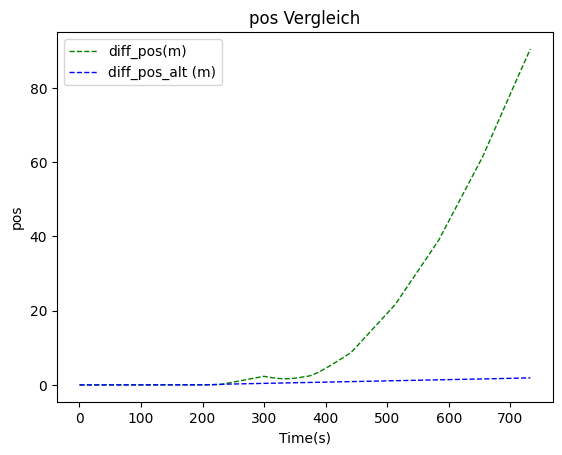

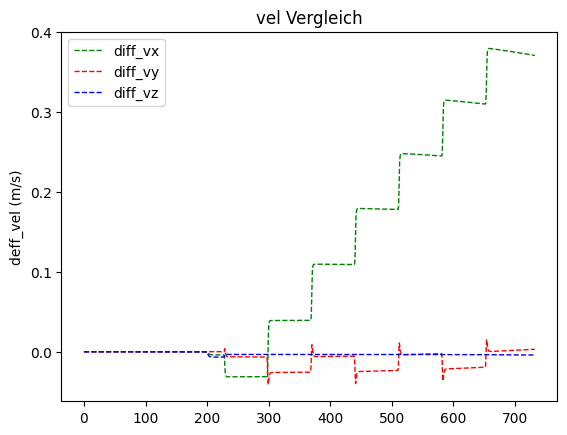

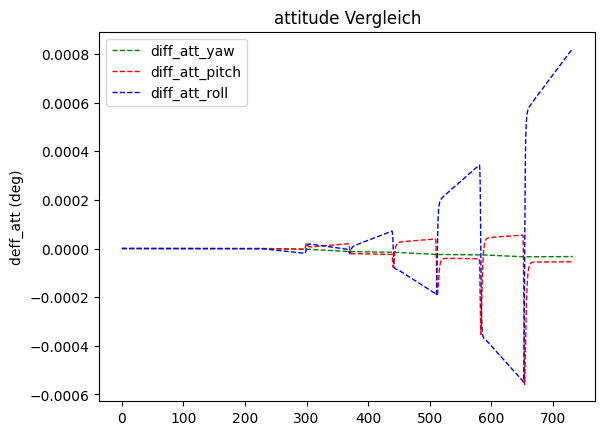

In [4]:
import os
import csv
import math
from geopy.distance import geodesic
import matplotlib.pyplot as plt

data_path = os.path.abspath('/workspaces/gnss-ins-sim/work/demo_saved_data/2023-08-11-13-41-55//')


def read_ref_pos(ref_pos_filename):
    with open(ref_pos_filename) as csvfile:
        csvreader = csv.reader(csvfile, delimiter = ',')
        header = next(csvfile)

        ref_pos_lat = []
        ref_pos_lon = []
        ref_pos_alt = []
    

        for row in csvreader:
            ref_pos_lat.append(float(row[0]))
            ref_pos_lon.append(float(row[1]))
            ref_pos_alt.append(float(row[2]))

        
    return ref_pos_lat, ref_pos_lon, ref_pos_alt

def read_pos(pos_filename):
    with open(pos_filename) as csvfile:
        csvreader = csv.reader(csvfile, delimiter = ',')
        header = next(csvfile)

        pos_lat = []
        pos_lon = []
        pos_alt = []
    

        for row in csvreader:
            pos_lat.append(float(row[0]))
            pos_lon.append(float(row[1]))
            pos_alt.append(float(row[2]))

        
    return pos_lat, pos_lon, pos_alt

def read_ref_vel(ref_vel_filename):
    with open(ref_vel_filename) as csvfile:
        csvreader = csv.reader(csvfile, delimiter = ',')
        header = next(csvfile)

        ref_vx = []
        ref_vy = []
        ref_vz = []
    

        for row in csvreader:
            ref_vx.append(float(row[0]))
            ref_vy.append(float(row[1]))
            ref_vz.append(float(row[2]))

        
    return ref_vx, ref_vy, ref_vz

def read_vel(vel_filename):
    with open(vel_filename) as csvfile:
        csvreader = csv.reader(csvfile, delimiter = ',')
        header = next(csvfile)

        vx = []
        vy = []
        vz = []
    

        for row in csvreader:
            vx.append(float(row[0]))
            vy.append(float(row[1]))
            vz.append(float(row[2]))

        
    return vx, vy, vz

def read_ref_att(ref_att_filename):
    with open(ref_att_filename) as csvfile:
        csvreader = csv.reader(csvfile, delimiter = ',')
        header = next(csvfile)

        ref_yaw = []
        ref_pitch = []
        ref_roll = []
    

        for row in csvreader:
            ref_yaw.append(float(row[0]))
            ref_pitch.append(float(row[1]))
            ref_roll.append(float(row[2]))

        
    return ref_yaw, ref_pitch, ref_roll

def read_att(att_filename):
    with open(att_filename) as csvfile:
        csvreader = csv.reader(csvfile, delimiter = ',')
        header = next(csvfile)

        yaw = []
        pitch = []
        roll = []
    

        for row in csvreader:
            yaw.append(float(row[0]))
            pitch.append(float(row[1]))
            roll.append(float(row[2]))

        
    return yaw, pitch, roll

def read_time(timefilename):
    with open(timefilename) as csvfile:
        csvreader = csv.reader(csvfile, delimiter = ',')
        header = next(csvfile)

        time = []
        
        for row in csvreader:
            time.append(float(row[0]))

    return time

def haversine_distance(lat1, lon1, lat2, lon2):
    
    R = 6371000  

    lat1_rad = math.radians(lat1)
    lon1_rad = math.radians(lon1)
    lat2_rad = math.radians(lat2)
    lon2_rad = math.radians(lon2)

    dlat = lat2_rad - lat1_rad
    dlon = lon2_rad - lon1_rad
    a = math.sin(dlat / 2) ** 2 + math.cos(lat1_rad) * math.cos(lat2_rad) * math.sin(dlon / 2) ** 2
    c = 2 * math.atan2(math.sqrt(a), math.sqrt(1 - a))
    distance = R * c

    return distance


if __name__ == "__main__":
    timefilename = data_path + "//time.csv"
    ref_pos_filename = data_path + "//ref_pos.csv"
    pos_filename = data_path + "//pos-algo0_0.csv" 
    ref_vel_filename = data_path + "//ref_vel.csv"
    vel_filename = data_path + "//vel-algo0_0.csv"
    ref_att_filename = data_path + "//ref_att_euler.csv"
    att_filename = data_path + "//att_euler-algo0_0.csv"
    
    time = read_time(timefilename)

    ref_pos_lat, ref_pos_lon, ref_pos_alt = read_ref_pos(ref_pos_filename)
    pos_lat, pos_lon, pos_alt = read_pos(pos_filename)

    ref_vx, ref_vy, ref_vz = read_ref_vel(ref_vel_filename)
    vx, vy, vz = read_vel(vel_filename)

    ref_yaw, ref_pitch, ref_roll = read_ref_att(ref_att_filename)
    yaw, pitch, roll = read_att(att_filename)
    diff_pos_m = [haversine_distance(lat1, lon1, lat2, lon2) for lat1, lon1, lat2, lon2 in zip(ref_pos_lat, ref_pos_lon, pos_lat, pos_lon)]

    diff_pos_alt = list()
    for item1, item2 in zip(ref_pos_alt, pos_alt):
        item = item1 - item2
        diff_pos_alt.append(item)
    
    plt.figure()
    plt.plot(time, diff_pos_m, color = 'g', linestyle = 'dashed', marker = '', linewidth= '1', label='diff_pos(m)')
    plt.plot(time, diff_pos_alt, color = 'b', linestyle = 'dashed', marker = '', linewidth= '1', label='diff_pos_alt (m)')
    plt.xlabel('Time(s)')
    plt.ylabel('pos')
    plt.title('pos Vergleich')  
    plt.legend()
    
    diff_vx = list()
    for item1, item2 in zip(ref_vx, vx):
        item = item1 - item2
        diff_vx.append(item)

    diff_vy = list()
    for item1, item2 in zip(ref_vy, vy):
        item = item1 - item2
        diff_vy.append(item)

    diff_vz = list()
    for item1, item2 in zip(ref_vz, vz):
        item = item1 - item2
        diff_vz.append(item)

    plt.figure()
    plt.plot(time, diff_vx, color = 'g', linestyle = 'dashed', marker = '', linewidth= '1', label='diff_vx')
    plt.plot(time, diff_vy, color = 'r', linestyle = 'dashed', marker = '', linewidth= '1', label='diff_vy')
    plt.plot(time, diff_vz, color = 'b', linestyle = 'dashed', marker = '', linewidth= '1', label='diff_vz')
    plt.ylabel('deff_vel (m/s)')
    plt.title('vel Vergleich')  
    plt.legend()

    diff_att_yaw = list()
    for item1, item2 in zip(ref_yaw, yaw):
        item = item1 - item2
        diff_att_yaw.append(item)

    diff_att_pitch = list()
    for item1, item2 in zip(ref_pitch, pitch):
        item = item1 - item2
        diff_att_pitch.append(item)

    diff_att_roll = list()
    for item1, item2 in zip(ref_roll, roll):
        item = item1 - item2
        diff_att_roll.append(item)

    plt.figure()
    plt.plot(time, diff_att_yaw, color = 'g', linestyle = 'dashed', marker = '', linewidth= '1', label='diff_att_yaw')
    plt.plot(time, diff_att_pitch, color = 'r', linestyle = 'dashed', marker = '', linewidth= '1', label='diff_att_pitch')
    plt.plot(time, diff_att_roll, color = 'b', linestyle = 'dashed', marker = '', linewidth= '1', label='diff_att_roll')
    plt.ylabel('deff_att (deg)')
    plt.title('attitude Vergleich')  
    plt.legend()

Connected to Python 3.10.8

In [1]:
import csv
import math
from squaternion import Quaternion
from datetime import datetime

def quaternion_to_euler(qw, qx, qy, qz):


    roll = math.atan2(2*(qw*qx + qy*qz), 1 - 2*(qx*qx + qy*qy))
    pitch = math.asin(2*(qw*qy - qz*qx))
    yaw = math.atan2(2*(qw*qz + qx*qy), 1 - 2*(qy*qy + qz*qz))

    return math.degrees(roll), math.degrees(pitch), math.degrees(yaw)

def read_quaternions(filename):

    quaternions = []
    
    with open(filename, 'r', newline='') as csvfile:
        csvreader = csv.reader(csvfile)
        header = next(csvreader)       

        s_colums = ["q_RS_w []", "q_RS_x []", "q_RS_y []", "q_RS_z []"]
        s_indices = [header.index(column) for column in s_colums]

        for row in csvreader:
            s_row = [float(row[i]) for i in s_indices]
            quaternions.append(tuple(s_row))

    return quaternions

def read_time(filename):
    timestamps = []
    time_changes = []
    
   
    with open (filename, 'r', newline='') as csvfile:
        csvreader = csv.reader(csvfile)
        header = next(csvreader)

        t_colum = "#timestamp [ns]"
        if header.index(t_colum) == 1:
            t_indix = header.index(t_colum)
            
            for row in csvreader:
                timestamps.append(row[t_indix])

            for i in range(1, len(timestamps)):
                diff = (float(timestamps[i]) - float(timestamps[i-1]))*1e-9 
                time_changes.append(diff)
        else:
            for row in csvreader:
                timestamps.append(row[0])

            for i in range(1, len(timestamps)):
                diff = 4999936*1e-9
                time_changes.append(diff)
        
    return time_changes

    

def read_position(filename): 

    x_positions = []
    y_positions = []
    z_positions = []

    with open (filename, 'r', newline='') as csvfile:

        csvreader = csv.reader(csvfile)
        header = next(csvreader)       
        
        # x-yostion
        x_colum = "p_RS_R_x [m]"
        y_colum = "p_RS_R_y [m]"
        z_colum = "p_RS_R_z [m]"
        
        x_index = header.index(x_colum)
        y_index = header.index(y_colum)
        z_index = header.index(z_colum)

        for row in csvreader:
            x_positions.append(float(row[x_index]))
            y_positions.append(float(row[y_index]))
            z_positions.append(float(row[z_index]))

    return x_positions, y_positions, z_positions



def calc_velocity(filename):
    x_velocity = []
    y_velocity = []
    z_velocity = []

    x_velocity_l = []
    y_velocity_l = []
    z_velocity_l = []

    time = read_time(filename)
    x_positions, y_positions, z_positions = read_position(filename)

    for i in range(1,len(time)+1):
        x_velocity = (float(x_positions[i])-float(x_positions[i-1]))/float(time[i-1])
        x_velocity_l.append(x_velocity)
        y_velocity = (float(y_positions[i])-float(y_positions[i-1]))/float(time[i-1])
        y_velocity_l.append(y_velocity)
        z_velocity = (float(z_positions[i])-float(z_positions[i-1]))/float(time[i-1])
        z_velocity_l.append(z_velocity)

    return x_velocity_l, y_velocity_l, z_velocity_l

if __name__ == "__main__":
    filename = "/workspaces/gnss-ins-sim/vergleich.csv" 
    
    # position
    x_positions, y_positions, z_positions = read_position(filename)

    # attitude
    quaternions = read_quaternions(filename)
    roll_l = []
    pitch_l = []
    yaw_l = []

    for qw, qx, qy, qz in quaternions:
        roll, pitch, yaw = quaternion_to_euler(qw, qx, qy, qz)
        roll_l.append(roll)
        pitch_l.append(pitch)
        yaw_l.append(yaw)
        
    # time
    time = read_time(filename)

    # command_type
    command_type = [2] * len(time)

    # GPS-visibility
    gps_visibility = [0] * len(time)

    # int Pos
    ini_lat = 0
    ini_long = 0
    ini_alt = 0

    # velocity
    x_velocity, y_velocity, z_velocity = calc_velocity(filename)
 

    # csv
    new_filename = datetime.now().strftime('/workspaces/gnss-ins-sim/test-motion_def/motion_def-%Y-%m-%d-%H-%M.csv')
    header1 = ['Ini lat(deg)', 'Ini lon(deg)', 'Ini alt(m)', 'Ini vx_body (m/s)', 'Ini vy_body (m/s)', 'Ini vz_body (m/s)', 'Ini yaw (deg)', 'Ini pitch (deg)', 'Ini roll (deg)']
    header2 = ['command type', 'yaw (deg)', 'pitch (deg)', 'roll (deg)', 'vx_body(m/s)', 'vy_body(m/s)', 'vz_body(m/s)', 'command duration (s)', 'GPS visibility']
    init = [ini_lat, ini_long, ini_alt, x_velocity[0], y_velocity[0], z_velocity[0], yaw_l[0], pitch_l[0], roll_l[0]]

    yaw_l.pop(0)
    pitch_l.pop(0)
    roll_l.pop(0)
    
    x_velocity.pop(0)
    y_velocity.pop(0)
    z_velocity.pop(0)

    

    with open(new_filename, 'w+', encoding='UTF8', newline='', ) as newcsv:
        writer = csv.writer(newcsv)

        writer.writerow(header1)
        writer.writerow(init)
        writer.writerow(header2)
        for i in zip(command_type, yaw_l, pitch_l, roll_l, x_velocity, y_velocity, z_velocity, time, gps_visibility):
             writer.writerow(i)

    print(len(command_type))
    print(len(yaw_l))
    print(len(pitch_l))
    print(len(roll_l))
    print(len(x_velocity))
    print(len(y_velocity))
    print(len(z_velocity))
    print(len(time))
    print(len(gps_visibility))

28711
28711
28711
28711
28710
28710
28710
28711
28711


Connected to Python 3.10.8

In [1]:
import csv
import math
from squaternion import Quaternion
from datetime import datetime

def quaternion_to_euler(qw, qx, qy, qz):
    q = [qw, qx, qy, qz]

    roll, pitch, yaw = Quaternion.to_euler(q, degrees= True)

    #roll = math.atan2(2*(qw*qx + qy*qz), 1 - 2*(qx*qx + qy*qy))
    #pitch = math.asin(2*(qw*qy - qz*qx))
    #yaw = math.atan2(2*(qw*qz + qx*qy), 1 - 2*(qy*qy + qz*qz))

    return math.degrees(roll), math.degrees(pitch), math.degrees(yaw)

def read_quaternions(filename):

    quaternions = []
    
    with open(filename, 'r', newline='') as csvfile:
        csvreader = csv.reader(csvfile)
        header = next(csvreader)       

        s_colums = ["q_RS_w []", "q_RS_x []", "q_RS_y []", "q_RS_z []"]
        s_indices = [header.index(column) for column in s_colums]

        for row in csvreader:
            s_row = [float(row[i]) for i in s_indices]
            quaternions.append(tuple(s_row))

    return quaternions

def read_time(filename):
    timestamps = []
    time_changes = []
    
   
    with open (filename, 'r', newline='') as csvfile:
        csvreader = csv.reader(csvfile)
        header = next(csvreader)

        t_colum = "#timestamp [ns]"
        if header.index(t_colum) == 1:
            t_indix = header.index(t_colum)
            
            for row in csvreader:
                timestamps.append(row[t_indix])

            for i in range(1, len(timestamps)):
                diff = (float(timestamps[i]) - float(timestamps[i-1]))*1e-9 
                time_changes.append(diff)
        else:
            for row in csvreader:
                timestamps.append(row[0])

            for i in range(1, len(timestamps)):
                diff = 4999936*1e-9
                time_changes.append(diff)
        
    return time_changes

    

def read_position(filename): 

    x_positions = []
    y_positions = []
    z_positions = []

    with open (filename, 'r', newline='') as csvfile:

        csvreader = csv.reader(csvfile)
        header = next(csvreader)       
        
        # x-yostion
        x_colum = "p_RS_R_x [m]"
        y_colum = "p_RS_R_y [m]"
        z_colum = "p_RS_R_z [m]"
        
        x_index = header.index(x_colum)
        y_index = header.index(y_colum)
        z_index = header.index(z_colum)

        for row in csvreader:
            x_positions.append(float(row[x_index]))
            y_positions.append(float(row[y_index]))
            z_positions.append(float(row[z_index]))

    return x_positions, y_positions, z_positions



def calc_velocity(filename):
    x_velocity = []
    y_velocity = []
    z_velocity = []

    x_velocity_l = []
    y_velocity_l = []
    z_velocity_l = []

    time = read_time(filename)
    x_positions, y_positions, z_positions = read_position(filename)

    for i in range(1,len(time)+1):
        x_velocity = (float(x_positions[i])-float(x_positions[i-1]))/float(time[i-1])
        x_velocity_l.append(x_velocity)
        y_velocity = (float(y_positions[i])-float(y_positions[i-1]))/float(time[i-1])
        y_velocity_l.append(y_velocity)
        z_velocity = (float(z_positions[i])-float(z_positions[i-1]))/float(time[i-1])
        z_velocity_l.append(z_velocity)

    return x_velocity_l, y_velocity_l, z_velocity_l

if __name__ == "__main__":
    filename = "/workspaces/gnss-ins-sim/vergleich.csv" 
    
    # position
    x_positions, y_positions, z_positions = read_position(filename)

    # attitude
    quaternions = read_quaternions(filename)
    roll_l = []
    pitch_l = []
    yaw_l = []

    for qw, qx, qy, qz in quaternions:
        roll, pitch, yaw = quaternion_to_euler(qw, qx, qy, qz)
        roll_l.append(roll)
        pitch_l.append(pitch)
        yaw_l.append(yaw)
        
    # time
    time = read_time(filename)

    # command_type
    command_type = [2] * len(time)

    # GPS-visibility
    gps_visibility = [0] * len(time)

    # int Pos
    ini_lat = 0
    ini_long = 0
    ini_alt = 0

    # velocity
    x_velocity, y_velocity, z_velocity = calc_velocity(filename)
 

    # csv
    new_filename = datetime.now().strftime('/workspaces/gnss-ins-sim/test-motion_def/motion_def-%Y-%m-%d-%H-%M.csv')
    header1 = ['Ini lat(deg)', 'Ini lon(deg)', 'Ini alt(m)', 'Ini vx_body (m/s)', 'Ini vy_body (m/s)', 'Ini vz_body (m/s)', 'Ini yaw (deg)', 'Ini pitch (deg)', 'Ini roll (deg)']
    header2 = ['command type', 'yaw (deg)', 'pitch (deg)', 'roll (deg)', 'vx_body(m/s)', 'vy_body(m/s)', 'vz_body(m/s)', 'command duration (s)', 'GPS visibility']
    init = [ini_lat, ini_long, ini_alt, x_velocity[0], y_velocity[0], z_velocity[0], yaw_l[0], pitch_l[0], roll_l[0]]

    yaw_l.pop(0)
    pitch_l.pop(0)
    roll_l.pop(0)
    
    x_velocity.pop(0)
    y_velocity.pop(0)
    z_velocity.pop(0)

    

    with open(new_filename, 'w+', encoding='UTF8', newline='', ) as newcsv:
        writer = csv.writer(newcsv)

        writer.writerow(header1)
        writer.writerow(init)
        writer.writerow(header2)
        for i in zip(command_type, yaw_l, pitch_l, roll_l, x_velocity, y_velocity, z_velocity, time, gps_visibility):
             writer.writerow(i)

    print(len(command_type))
    print(len(yaw_l))
    print(len(pitch_l))
    print(len(roll_l))
    print(len(x_velocity))
    print(len(y_velocity))
    print(len(z_velocity))
    print(len(time))
    print(len(gps_visibility))

AttributeError: 'list' object has no attribute 'y'

In [2]:
import csv
import math
from squaternion import Quaternion
from datetime import datetime

def quaternion_to_euler(qw, qx, qy, qz):
    q = [qw, qx, qy, qz]

    roll, pitch, yaw = Quaternion.to_euler(q, degrees= True)

    #roll = math.atan2(2*(qw*qx + qy*qz), 1 - 2*(qx*qx + qy*qy))
    #pitch = math.asin(2*(qw*qy - qz*qx))
    #yaw = math.atan2(2*(qw*qz + qx*qy), 1 - 2*(qy*qy + qz*qz))

    #return math.degrees(roll), math.degrees(pitch), math.degrees(yaw)
    return roll, pitch, yaw

def read_quaternions(filename):

    quaternions = []
    
    with open(filename, 'r', newline='') as csvfile:
        csvreader = csv.reader(csvfile)
        header = next(csvreader)       

        s_colums = ["q_RS_w []", "q_RS_x []", "q_RS_y []", "q_RS_z []"]
        s_indices = [header.index(column) for column in s_colums]

        for row in csvreader:
            s_row = [float(row[i]) for i in s_indices]
            quaternions.append(tuple(s_row))

    return quaternions

def read_time(filename):
    timestamps = []
    time_changes = []
    
   
    with open (filename, 'r', newline='') as csvfile:
        csvreader = csv.reader(csvfile)
        header = next(csvreader)

        t_colum = "#timestamp [ns]"
        if header.index(t_colum) == 1:
            t_indix = header.index(t_colum)
            
            for row in csvreader:
                timestamps.append(row[t_indix])

            for i in range(1, len(timestamps)):
                diff = (float(timestamps[i]) - float(timestamps[i-1]))*1e-9 
                time_changes.append(diff)
        else:
            for row in csvreader:
                timestamps.append(row[0])

            for i in range(1, len(timestamps)):
                diff = 4999936*1e-9
                time_changes.append(diff)
        
    return time_changes

    

def read_position(filename): 

    x_positions = []
    y_positions = []
    z_positions = []

    with open (filename, 'r', newline='') as csvfile:

        csvreader = csv.reader(csvfile)
        header = next(csvreader)       
        
        # x-yostion
        x_colum = "p_RS_R_x [m]"
        y_colum = "p_RS_R_y [m]"
        z_colum = "p_RS_R_z [m]"
        
        x_index = header.index(x_colum)
        y_index = header.index(y_colum)
        z_index = header.index(z_colum)

        for row in csvreader:
            x_positions.append(float(row[x_index]))
            y_positions.append(float(row[y_index]))
            z_positions.append(float(row[z_index]))

    return x_positions, y_positions, z_positions



def calc_velocity(filename):
    x_velocity = []
    y_velocity = []
    z_velocity = []

    x_velocity_l = []
    y_velocity_l = []
    z_velocity_l = []

    time = read_time(filename)
    x_positions, y_positions, z_positions = read_position(filename)

    for i in range(1,len(time)+1):
        x_velocity = (float(x_positions[i])-float(x_positions[i-1]))/float(time[i-1])
        x_velocity_l.append(x_velocity)
        y_velocity = (float(y_positions[i])-float(y_positions[i-1]))/float(time[i-1])
        y_velocity_l.append(y_velocity)
        z_velocity = (float(z_positions[i])-float(z_positions[i-1]))/float(time[i-1])
        z_velocity_l.append(z_velocity)

    return x_velocity_l, y_velocity_l, z_velocity_l

if __name__ == "__main__":
    filename = "/workspaces/gnss-ins-sim/vergleich.csv" 
    
    # position
    x_positions, y_positions, z_positions = read_position(filename)

    # attitude
    quaternions = read_quaternions(filename)
    roll_l = []
    pitch_l = []
    yaw_l = []

    for qw, qx, qy, qz in quaternions:
        roll, pitch, yaw = quaternion_to_euler(qw, qx, qy, qz)
        roll_l.append(roll)
        pitch_l.append(pitch)
        yaw_l.append(yaw)
        
    # time
    time = read_time(filename)

    # command_type
    command_type = [2] * len(time)

    # GPS-visibility
    gps_visibility = [0] * len(time)

    # int Pos
    ini_lat = 0
    ini_long = 0
    ini_alt = 0

    # velocity
    x_velocity, y_velocity, z_velocity = calc_velocity(filename)
 

    # csv
    new_filename = datetime.now().strftime('/workspaces/gnss-ins-sim/test-motion_def/motion_def-%Y-%m-%d-%H-%M.csv')
    header1 = ['Ini lat(deg)', 'Ini lon(deg)', 'Ini alt(m)', 'Ini vx_body (m/s)', 'Ini vy_body (m/s)', 'Ini vz_body (m/s)', 'Ini yaw (deg)', 'Ini pitch (deg)', 'Ini roll (deg)']
    header2 = ['command type', 'yaw (deg)', 'pitch (deg)', 'roll (deg)', 'vx_body(m/s)', 'vy_body(m/s)', 'vz_body(m/s)', 'command duration (s)', 'GPS visibility']
    init = [ini_lat, ini_long, ini_alt, x_velocity[0], y_velocity[0], z_velocity[0], yaw_l[0], pitch_l[0], roll_l[0]]

    yaw_l.pop(0)
    pitch_l.pop(0)
    roll_l.pop(0)
    
    x_velocity.pop(0)
    y_velocity.pop(0)
    z_velocity.pop(0)

    

    with open(new_filename, 'w+', encoding='UTF8', newline='', ) as newcsv:
        writer = csv.writer(newcsv)

        writer.writerow(header1)
        writer.writerow(init)
        writer.writerow(header2)
        for i in zip(command_type, yaw_l, pitch_l, roll_l, x_velocity, y_velocity, z_velocity, time, gps_visibility):
             writer.writerow(i)

    print(len(command_type))
    print(len(yaw_l))
    print(len(pitch_l))
    print(len(roll_l))
    print(len(x_velocity))
    print(len(y_velocity))
    print(len(z_velocity))
    print(len(time))
    print(len(gps_visibility))

AttributeError: 'list' object has no attribute 'y'

In [3]:
import csv
import math
from squaternion import Quaternion
from datetime import datetime

def quaternion_to_euler(qw, qx, qy, qz):
    q = [qw, qx, qy, qz]

    euler = Quaternion.to_euler(q, degrees= True)

    #roll = math.atan2(2*(qw*qx + qy*qz), 1 - 2*(qx*qx + qy*qy))
    #pitch = math.asin(2*(qw*qy - qz*qx))
    #yaw = math.atan2(2*(qw*qz + qx*qy), 1 - 2*(qy*qy + qz*qz))

    #return math.degrees(roll), math.degrees(pitch), math.degrees(yaw)
    return euler

def read_quaternions(filename):

    quaternions = []
    
    with open(filename, 'r', newline='') as csvfile:
        csvreader = csv.reader(csvfile)
        header = next(csvreader)       

        s_colums = ["q_RS_w []", "q_RS_x []", "q_RS_y []", "q_RS_z []"]
        s_indices = [header.index(column) for column in s_colums]

        for row in csvreader:
            s_row = [float(row[i]) for i in s_indices]
            quaternions.append(tuple(s_row))

    return quaternions

def read_time(filename):
    timestamps = []
    time_changes = []
    
   
    with open (filename, 'r', newline='') as csvfile:
        csvreader = csv.reader(csvfile)
        header = next(csvreader)

        t_colum = "#timestamp [ns]"
        if header.index(t_colum) == 1:
            t_indix = header.index(t_colum)
            
            for row in csvreader:
                timestamps.append(row[t_indix])

            for i in range(1, len(timestamps)):
                diff = (float(timestamps[i]) - float(timestamps[i-1]))*1e-9 
                time_changes.append(diff)
        else:
            for row in csvreader:
                timestamps.append(row[0])

            for i in range(1, len(timestamps)):
                diff = 4999936*1e-9
                time_changes.append(diff)
        
    return time_changes

    

def read_position(filename): 

    x_positions = []
    y_positions = []
    z_positions = []

    with open (filename, 'r', newline='') as csvfile:

        csvreader = csv.reader(csvfile)
        header = next(csvreader)       
        
        # x-yostion
        x_colum = "p_RS_R_x [m]"
        y_colum = "p_RS_R_y [m]"
        z_colum = "p_RS_R_z [m]"
        
        x_index = header.index(x_colum)
        y_index = header.index(y_colum)
        z_index = header.index(z_colum)

        for row in csvreader:
            x_positions.append(float(row[x_index]))
            y_positions.append(float(row[y_index]))
            z_positions.append(float(row[z_index]))

    return x_positions, y_positions, z_positions



def calc_velocity(filename):
    x_velocity = []
    y_velocity = []
    z_velocity = []

    x_velocity_l = []
    y_velocity_l = []
    z_velocity_l = []

    time = read_time(filename)
    x_positions, y_positions, z_positions = read_position(filename)

    for i in range(1,len(time)+1):
        x_velocity = (float(x_positions[i])-float(x_positions[i-1]))/float(time[i-1])
        x_velocity_l.append(x_velocity)
        y_velocity = (float(y_positions[i])-float(y_positions[i-1]))/float(time[i-1])
        y_velocity_l.append(y_velocity)
        z_velocity = (float(z_positions[i])-float(z_positions[i-1]))/float(time[i-1])
        z_velocity_l.append(z_velocity)

    return x_velocity_l, y_velocity_l, z_velocity_l

if __name__ == "__main__":
    filename = "/workspaces/gnss-ins-sim/vergleich.csv" 
    
    # position
    x_positions, y_positions, z_positions = read_position(filename)

    # attitude
    quaternions = read_quaternions(filename)
    roll_l = []
    pitch_l = []
    yaw_l = []

    for qw, qx, qy, qz in quaternions:
        roll, pitch, yaw = quaternion_to_euler(qw, qx, qy, qz)
        roll_l.append(roll)
        pitch_l.append(pitch)
        yaw_l.append(yaw)
        
    # time
    time = read_time(filename)

    # command_type
    command_type = [2] * len(time)

    # GPS-visibility
    gps_visibility = [0] * len(time)

    # int Pos
    ini_lat = 0
    ini_long = 0
    ini_alt = 0

    # velocity
    x_velocity, y_velocity, z_velocity = calc_velocity(filename)
 

    # csv
    new_filename = datetime.now().strftime('/workspaces/gnss-ins-sim/test-motion_def/motion_def-%Y-%m-%d-%H-%M.csv')
    header1 = ['Ini lat(deg)', 'Ini lon(deg)', 'Ini alt(m)', 'Ini vx_body (m/s)', 'Ini vy_body (m/s)', 'Ini vz_body (m/s)', 'Ini yaw (deg)', 'Ini pitch (deg)', 'Ini roll (deg)']
    header2 = ['command type', 'yaw (deg)', 'pitch (deg)', 'roll (deg)', 'vx_body(m/s)', 'vy_body(m/s)', 'vz_body(m/s)', 'command duration (s)', 'GPS visibility']
    init = [ini_lat, ini_long, ini_alt, x_velocity[0], y_velocity[0], z_velocity[0], yaw_l[0], pitch_l[0], roll_l[0]]

    yaw_l.pop(0)
    pitch_l.pop(0)
    roll_l.pop(0)
    
    x_velocity.pop(0)
    y_velocity.pop(0)
    z_velocity.pop(0)

    

    with open(new_filename, 'w+', encoding='UTF8', newline='', ) as newcsv:
        writer = csv.writer(newcsv)

        writer.writerow(header1)
        writer.writerow(init)
        writer.writerow(header2)
        for i in zip(command_type, yaw_l, pitch_l, roll_l, x_velocity, y_velocity, z_velocity, time, gps_visibility):
             writer.writerow(i)

    print(len(command_type))
    print(len(yaw_l))
    print(len(pitch_l))
    print(len(roll_l))
    print(len(x_velocity))
    print(len(y_velocity))
    print(len(z_velocity))
    print(len(time))
    print(len(gps_visibility))

AttributeError: 'list' object has no attribute 'y'

In [4]:
import csv
import math
from squaternion import Quaternion
from datetime import datetime

def quaternion_to_euler(qw, qx, qy, qz):
    q = [qw, qx, qy, qz]

    euler = Quaternion.to_euler(q, degrees= True)

    #roll = math.atan2(2*(qw*qx + qy*qz), 1 - 2*(qx*qx + qy*qy))
    #pitch = math.asin(2*(qw*qy - qz*qx))
    #yaw = math.atan2(2*(qw*qz + qx*qy), 1 - 2*(qy*qy + qz*qz))

    #return math.degrees(roll), math.degrees(pitch), math.degrees(yaw)
    return euler

def read_quaternions(filename):

    quaternions = []
    
    with open(filename, 'r', newline='') as csvfile:
        csvreader = csv.reader(csvfile)
        header = next(csvreader)       

        s_colums = ["q_RS_w []", "q_RS_x []", "q_RS_y []", "q_RS_z []"]
        s_indices = [header.index(column) for column in s_colums]

        for row in csvreader:
            s_row = [float(row[i]) for i in s_indices]
            quaternions.append(tuple(s_row))

    return quaternions

def read_time(filename):
    timestamps = []
    time_changes = []
    
   
    with open (filename, 'r', newline='') as csvfile:
        csvreader = csv.reader(csvfile)
        header = next(csvreader)

        t_colum = "#timestamp [ns]"
        if header.index(t_colum) == 1:
            t_indix = header.index(t_colum)
            
            for row in csvreader:
                timestamps.append(row[t_indix])

            for i in range(1, len(timestamps)):
                diff = (float(timestamps[i]) - float(timestamps[i-1]))*1e-9 
                time_changes.append(diff)
        else:
            for row in csvreader:
                timestamps.append(row[0])

            for i in range(1, len(timestamps)):
                diff = 4999936*1e-9
                time_changes.append(diff)
        
    return time_changes

    

def read_position(filename): 

    x_positions = []
    y_positions = []
    z_positions = []

    with open (filename, 'r', newline='') as csvfile:

        csvreader = csv.reader(csvfile)
        header = next(csvreader)       
        
        # x-yostion
        x_colum = "p_RS_R_x [m]"
        y_colum = "p_RS_R_y [m]"
        z_colum = "p_RS_R_z [m]"
        
        x_index = header.index(x_colum)
        y_index = header.index(y_colum)
        z_index = header.index(z_colum)

        for row in csvreader:
            x_positions.append(float(row[x_index]))
            y_positions.append(float(row[y_index]))
            z_positions.append(float(row[z_index]))

    return x_positions, y_positions, z_positions



def calc_velocity(filename):
    x_velocity = []
    y_velocity = []
    z_velocity = []

    x_velocity_l = []
    y_velocity_l = []
    z_velocity_l = []

    time = read_time(filename)
    x_positions, y_positions, z_positions = read_position(filename)

    for i in range(1,len(time)+1):
        x_velocity = (float(x_positions[i])-float(x_positions[i-1]))/float(time[i-1])
        x_velocity_l.append(x_velocity)
        y_velocity = (float(y_positions[i])-float(y_positions[i-1]))/float(time[i-1])
        y_velocity_l.append(y_velocity)
        z_velocity = (float(z_positions[i])-float(z_positions[i-1]))/float(time[i-1])
        z_velocity_l.append(z_velocity)

    return x_velocity_l, y_velocity_l, z_velocity_l

if __name__ == "__main__":
    filename = "/workspaces/gnss-ins-sim/vergleich.csv" 
    
    # position
    x_positions, y_positions, z_positions = read_position(filename)

    # attitude
    quaternions = read_quaternions(filename)
    roll_l = []
    pitch_l = []
    yaw_l = []
    """
    for qw, qx, qy, qz in quaternions:
        roll, pitch, yaw = quaternion_to_euler(qw, qx, qy, qz)
        roll_l.append(roll)
        pitch_l.append(pitch)
        yaw_l.append(yaw)
    """
    euler = quaternion_to_euler(quaternions)   
    # time
    time = read_time(filename)

    # command_type
    command_type = [2] * len(time)

    # GPS-visibility
    gps_visibility = [0] * len(time)

    # int Pos
    ini_lat = 0
    ini_long = 0
    ini_alt = 0

    # velocity
    x_velocity, y_velocity, z_velocity = calc_velocity(filename)
 

    # csv
    new_filename = datetime.now().strftime('/workspaces/gnss-ins-sim/test-motion_def/motion_def-%Y-%m-%d-%H-%M.csv')
    header1 = ['Ini lat(deg)', 'Ini lon(deg)', 'Ini alt(m)', 'Ini vx_body (m/s)', 'Ini vy_body (m/s)', 'Ini vz_body (m/s)', 'Ini yaw (deg)', 'Ini pitch (deg)', 'Ini roll (deg)']
    header2 = ['command type', 'yaw (deg)', 'pitch (deg)', 'roll (deg)', 'vx_body(m/s)', 'vy_body(m/s)', 'vz_body(m/s)', 'command duration (s)', 'GPS visibility']
    init = [ini_lat, ini_long, ini_alt, x_velocity[0], y_velocity[0], z_velocity[0], yaw_l[0], pitch_l[0], roll_l[0]]

    yaw_l.pop(0)
    pitch_l.pop(0)
    roll_l.pop(0)
    
    x_velocity.pop(0)
    y_velocity.pop(0)
    z_velocity.pop(0)

    

    with open(new_filename, 'w+', encoding='UTF8', newline='', ) as newcsv:
        writer = csv.writer(newcsv)

        writer.writerow(header1)
        writer.writerow(init)
        writer.writerow(header2)
        for i in zip(command_type, yaw_l, pitch_l, roll_l, x_velocity, y_velocity, z_velocity, time, gps_visibility):
             writer.writerow(i)

    print(len(command_type))
    print(len(yaw_l))
    print(len(pitch_l))
    print(len(roll_l))
    print(len(x_velocity))
    print(len(y_velocity))
    print(len(z_velocity))
    print(len(time))
    print(len(gps_visibility))

TypeError: quaternion_to_euler() missing 3 required positional arguments: 'qx', 'qy', and 'qz'

In [5]:
import csv
import math
from squaternion import Quaternion
from datetime import datetime

def quaternion_to_euler(qw, qx, qy, qz):
    q = [qw, qx, qy, qz]

    euler = Quaternion.to_euler(q, degrees= True)

    #roll = math.atan2(2*(qw*qx + qy*qz), 1 - 2*(qx*qx + qy*qy))
    #pitch = math.asin(2*(qw*qy - qz*qx))
    #yaw = math.atan2(2*(qw*qz + qx*qy), 1 - 2*(qy*qy + qz*qz))

    #return math.degrees(roll), math.degrees(pitch), math.degrees(yaw)
    return euler

def read_quaternions(filename):

    quaternions = []
    
    with open(filename, 'r', newline='') as csvfile:
        csvreader = csv.reader(csvfile)
        header = next(csvreader)       

        s_colums = ["q_RS_w []", "q_RS_x []", "q_RS_y []", "q_RS_z []"]
        s_indices = [header.index(column) for column in s_colums]

        for row in csvreader:
            s_row = [float(row[i]) for i in s_indices]
            quaternions.append(tuple(s_row))

    return quaternions

def read_time(filename):
    timestamps = []
    time_changes = []
    
   
    with open (filename, 'r', newline='') as csvfile:
        csvreader = csv.reader(csvfile)
        header = next(csvreader)

        t_colum = "#timestamp [ns]"
        if header.index(t_colum) == 1:
            t_indix = header.index(t_colum)
            
            for row in csvreader:
                timestamps.append(row[t_indix])

            for i in range(1, len(timestamps)):
                diff = (float(timestamps[i]) - float(timestamps[i-1]))*1e-9 
                time_changes.append(diff)
        else:
            for row in csvreader:
                timestamps.append(row[0])

            for i in range(1, len(timestamps)):
                diff = 4999936*1e-9
                time_changes.append(diff)
        
    return time_changes

    

def read_position(filename): 

    x_positions = []
    y_positions = []
    z_positions = []

    with open (filename, 'r', newline='') as csvfile:

        csvreader = csv.reader(csvfile)
        header = next(csvreader)       
        
        # x-yostion
        x_colum = "p_RS_R_x [m]"
        y_colum = "p_RS_R_y [m]"
        z_colum = "p_RS_R_z [m]"
        
        x_index = header.index(x_colum)
        y_index = header.index(y_colum)
        z_index = header.index(z_colum)

        for row in csvreader:
            x_positions.append(float(row[x_index]))
            y_positions.append(float(row[y_index]))
            z_positions.append(float(row[z_index]))

    return x_positions, y_positions, z_positions



def calc_velocity(filename):
    x_velocity = []
    y_velocity = []
    z_velocity = []

    x_velocity_l = []
    y_velocity_l = []
    z_velocity_l = []

    time = read_time(filename)
    x_positions, y_positions, z_positions = read_position(filename)

    for i in range(1,len(time)+1):
        x_velocity = (float(x_positions[i])-float(x_positions[i-1]))/float(time[i-1])
        x_velocity_l.append(x_velocity)
        y_velocity = (float(y_positions[i])-float(y_positions[i-1]))/float(time[i-1])
        y_velocity_l.append(y_velocity)
        z_velocity = (float(z_positions[i])-float(z_positions[i-1]))/float(time[i-1])
        z_velocity_l.append(z_velocity)

    return x_velocity_l, y_velocity_l, z_velocity_l

if __name__ == "__main__":
    filename = "/workspaces/gnss-ins-sim/vergleich.csv" 
    
    # position
    x_positions, y_positions, z_positions = read_position(filename)

    # attitude
    quaternions = read_quaternions(filename)
    roll_l = []
    pitch_l = []
    yaw_l = []
    """
    for qw, qx, qy, qz in quaternions:
        roll, pitch, yaw = quaternion_to_euler(qw, qx, qy, qz)
        roll_l.append(roll)
        pitch_l.append(pitch)
        yaw_l.append(yaw)
    """
    euler = quaternion_to_euler(quaternions)   
    # time
    time = read_time(filename)

    # command_type
    command_type = [2] * len(time)

    # GPS-visibility
    gps_visibility = [0] * len(time)

    # int Pos
    ini_lat = 0
    ini_long = 0
    ini_alt = 0

    # velocity
    x_velocity, y_velocity, z_velocity = calc_velocity(filename)
 

    # csv
    new_filename = datetime.now().strftime('/workspaces/gnss-ins-sim/test-motion_def/motion_def-%Y-%m-%d-%H-%M.csv')
    header1 = ['Ini lat(deg)', 'Ini lon(deg)', 'Ini alt(m)', 'Ini vx_body (m/s)', 'Ini vy_body (m/s)', 'Ini vz_body (m/s)', 'Ini yaw (deg)', 'Ini pitch (deg)', 'Ini roll (deg)']
    header2 = ['command type', 'yaw (deg)', 'pitch (deg)', 'roll (deg)', 'vx_body(m/s)', 'vy_body(m/s)', 'vz_body(m/s)', 'command duration (s)', 'GPS visibility']
    init = [ini_lat, ini_long, ini_alt, x_velocity[0], y_velocity[0], z_velocity[0], yaw_l[0], pitch_l[0], roll_l[0]]

    yaw_l.pop(0)
    pitch_l.pop(0)
    roll_l.pop(0)
    
    x_velocity.pop(0)
    y_velocity.pop(0)
    z_velocity.pop(0)

    

    with open(new_filename, 'w+', encoding='UTF8', newline='', ) as newcsv:
        writer = csv.writer(newcsv)

        writer.writerow(header1)
        writer.writerow(init)
        writer.writerow(header2)
        for i in zip(command_type, yaw_l, pitch_l, roll_l, x_velocity, y_velocity, z_velocity, time, gps_visibility):
             writer.writerow(i)

    print(len(command_type))
    print(len(yaw_l))
    print(len(pitch_l))
    print(len(roll_l))
    print(len(x_velocity))
    print(len(y_velocity))
    print(len(z_velocity))
    print(len(time))
    print(len(gps_visibility))

TypeError: quaternion_to_euler() missing 3 required positional arguments: 'qx', 'qy', and 'qz'

In [6]:
import csv
import math
from squaternion import Quaternion
from datetime import datetime

def quaternion_to_euler(qw, qx, qy, qz):
    q = [qw, qx, qy, qz]

    euler = Quaternion.to_euler(q, degrees= True)

    #roll = math.atan2(2*(qw*qx + qy*qz), 1 - 2*(qx*qx + qy*qy))
    #pitch = math.asin(2*(qw*qy - qz*qx))
    #yaw = math.atan2(2*(qw*qz + qx*qy), 1 - 2*(qy*qy + qz*qz))

    #return math.degrees(roll), math.degrees(pitch), math.degrees(yaw)
    return euler

def read_quaternions(filename):

    quaternions = []
    
    with open(filename, 'r', newline='') as csvfile:
        csvreader = csv.reader(csvfile)
        header = next(csvreader)       

        s_colums = ["q_RS_w []", "q_RS_x []", "q_RS_y []", "q_RS_z []"]
        s_indices = [header.index(column) for column in s_colums]

        for row in csvreader:
            s_row = [float(row[i]) for i in s_indices]
            quaternions.append(tuple(s_row))

    return quaternions

def read_time(filename):
    timestamps = []
    time_changes = []
    
   
    with open (filename, 'r', newline='') as csvfile:
        csvreader = csv.reader(csvfile)
        header = next(csvreader)

        t_colum = "#timestamp [ns]"
        if header.index(t_colum) == 1:
            t_indix = header.index(t_colum)
            
            for row in csvreader:
                timestamps.append(row[t_indix])

            for i in range(1, len(timestamps)):
                diff = (float(timestamps[i]) - float(timestamps[i-1]))*1e-9 
                time_changes.append(diff)
        else:
            for row in csvreader:
                timestamps.append(row[0])

            for i in range(1, len(timestamps)):
                diff = 4999936*1e-9
                time_changes.append(diff)
        
    return time_changes

    

def read_position(filename): 

    x_positions = []
    y_positions = []
    z_positions = []

    with open (filename, 'r', newline='') as csvfile:

        csvreader = csv.reader(csvfile)
        header = next(csvreader)       
        
        # x-yostion
        x_colum = "p_RS_R_x [m]"
        y_colum = "p_RS_R_y [m]"
        z_colum = "p_RS_R_z [m]"
        
        x_index = header.index(x_colum)
        y_index = header.index(y_colum)
        z_index = header.index(z_colum)

        for row in csvreader:
            x_positions.append(float(row[x_index]))
            y_positions.append(float(row[y_index]))
            z_positions.append(float(row[z_index]))

    return x_positions, y_positions, z_positions



def calc_velocity(filename):
    x_velocity = []
    y_velocity = []
    z_velocity = []

    x_velocity_l = []
    y_velocity_l = []
    z_velocity_l = []

    time = read_time(filename)
    x_positions, y_positions, z_positions = read_position(filename)

    for i in range(1,len(time)+1):
        x_velocity = (float(x_positions[i])-float(x_positions[i-1]))/float(time[i-1])
        x_velocity_l.append(x_velocity)
        y_velocity = (float(y_positions[i])-float(y_positions[i-1]))/float(time[i-1])
        y_velocity_l.append(y_velocity)
        z_velocity = (float(z_positions[i])-float(z_positions[i-1]))/float(time[i-1])
        z_velocity_l.append(z_velocity)

    return x_velocity_l, y_velocity_l, z_velocity_l

if __name__ == "__main__":
    filename = "/workspaces/gnss-ins-sim/vergleich.csv" 
    
    # position
    x_positions, y_positions, z_positions = read_position(filename)

    # attitude
    quaternions = read_quaternions(filename)
    roll_l = []
    pitch_l = []
    yaw_l = []
    """
    for qw, qx, qy, qz in quaternions:
        roll, pitch, yaw = quaternion_to_euler(qw, qx, qy, qz)
        roll_l.append(roll)
        pitch_l.append(pitch)
        yaw_l.append(yaw)
    """
    for qw, qx, qy, qz in quaternions:
        euler = quaternion_to_euler(qw, qx, qy, qz)

    roll_l = map(lambda x: x[0], tuple)
    pitch_l = map(lambda x: x[1], tuple)
    yaw_l = map(lambda x: x[2], tuple)

     
    # time
    time = read_time(filename)

    # command_type
    command_type = [2] * len(time)

    # GPS-visibility
    gps_visibility = [0] * len(time)

    # int Pos
    ini_lat = 0
    ini_long = 0
    ini_alt = 0

    # velocity
    x_velocity, y_velocity, z_velocity = calc_velocity(filename)
 

    # csv
    new_filename = datetime.now().strftime('/workspaces/gnss-ins-sim/test-motion_def/motion_def-%Y-%m-%d-%H-%M.csv')
    header1 = ['Ini lat(deg)', 'Ini lon(deg)', 'Ini alt(m)', 'Ini vx_body (m/s)', 'Ini vy_body (m/s)', 'Ini vz_body (m/s)', 'Ini yaw (deg)', 'Ini pitch (deg)', 'Ini roll (deg)']
    header2 = ['command type', 'yaw (deg)', 'pitch (deg)', 'roll (deg)', 'vx_body(m/s)', 'vy_body(m/s)', 'vz_body(m/s)', 'command duration (s)', 'GPS visibility']
    init = [ini_lat, ini_long, ini_alt, x_velocity[0], y_velocity[0], z_velocity[0], yaw_l[0], pitch_l[0], roll_l[0]]

    yaw_l.pop(0)
    pitch_l.pop(0)
    roll_l.pop(0)
    
    x_velocity.pop(0)
    y_velocity.pop(0)
    z_velocity.pop(0)

    

    with open(new_filename, 'w+', encoding='UTF8', newline='', ) as newcsv:
        writer = csv.writer(newcsv)

        writer.writerow(header1)
        writer.writerow(init)
        writer.writerow(header2)
        for i in zip(command_type, yaw_l, pitch_l, roll_l, x_velocity, y_velocity, z_velocity, time, gps_visibility):
             writer.writerow(i)

    print(len(command_type))
    print(len(yaw_l))
    print(len(pitch_l))
    print(len(roll_l))
    print(len(x_velocity))
    print(len(y_velocity))
    print(len(z_velocity))
    print(len(time))
    print(len(gps_visibility))

AttributeError: 'list' object has no attribute 'y'